# Diageo Iowa Sales Performance Evaluation: Exploratory Data Analysis

**Objective:**  
This notebook aims to conduct an exploratory data analysis (EDA) to assess Diageo's sales performance in H1 2025, identify key growth or decline drivers, and evaluate Diageo’s position in the competitive landscape. The ultimate goal is to uncover insights that inform actionable strategies to help Diageo achieve its 5% full-year growth target for 2025.

**Key Steps:**

1. **Analyze Diageo's Sales Performance in H1 2025**  
   1.1 Review overall sales revenue and trends  
   1.2 Identify key drivers and engines of growth or decline

2. **Assess Competitive Market Landscape**  
   2.1 Evaluate Diageo’s current market share and position  
   2.2 Compare performance against top competitors to identify potential opportunities or threats

3. **Prepare Data for Dashboard Visualization**  
   Clean, transform, and structure data to support interactive dashboard development in the next phase.

# Analyze Diageo's Sales Performance in H1 2025

## 1.1 Review overall sales revenue and trends

In this section, I assess Diageo's overall sales performance in Iowa during H1 2025. I start by reviewing the total sales revenue, followed by a comparison with H1 2024 to evaluate the Year-over-Year (YoY) change in both absolute and percentage terms.

To understand the structure and quality of this performance, I examine supporting metrics such as:
- Total quantity sold
- Number of orders
- Average Order Value (AOV)
- Basket size (average quantity per transaction)

In addition, I analyze sales trends over time and explore patterns across multiple dimensions, including city, county, store, variant, and segment, to identify key drivers or bottlenecks that may have influenced performance.




I begin by importing and reviewing the dataset, then create a separate DataFrame for Diageo to make the later analysis more convenient.

In [1]:
import pandas as pd

df_clean = pd.read_pickle("C:/Users/vothk/Portfolio/Diageo-Iowa-B2B-Sales-Performance-Forecasting-Dashboard-for-2025/Data/Clean_data/df_clean_data.pickle")

pd.set_option('display.max_columns', None)
df_clean.head(5)

,Invoice/Item Number,Date,Store Name,Address,City,Store Location,County,Category Name,Manufacturer Name,Item Description,Pack,Bottle Volume,State Bottle Cost,State Bottle Retail,Bottles Sold,Sale,Volume Sold (Liters),Volume Sold (Gallons),Year,Quarter,Month,Weekday,Weekend,Season,Revenue,CLV,Average_Order_Value,Frequency,Lifespan_months,Alcohol Type,Alcohol Brand,Price_750ml,Segment
0,INV-54554500001,2023-01-02,Best Trip,"1516, SE 1ST ST",Des Moines,POINT (-93.61379 41.57608),Polk,100% Agave Tequila,Diageo Americas,Casamigos Reposado,6,750,29.99,44.99,3,134.97,2.25,0.59,2023,1,1,Monday,False,Winter,89.97,117547.74,51.420709,189.447514,12.066667,Tequila & Mezcal,Casamigos,56.237500,Ultra Premium
1,INV-54554700023,2023-01-02,World Liquor & Tobacco + Vapors / Des Moines,3200 SOUTHEAST 14TH STREET,Des Moines,POINT (-93.59738 41.55503),Polk,Mixto Tequila,Proximo,Jose Cuervo Especial Reposado,48,200,3.63,5.45,48,261.60,9.60,2.53,2023,1,1,Monday,False,Winter,174.24,311668.10,87.522634,295.110497,12.066667,Tequila & Mezcal,Jose Cuervo,25.546875,Super Premium
2,INV-54554700003,2023-01-02,World Liquor & Tobacco + Vapors / Des Moines,3200 SOUTHEAST 14TH STREET,Des Moines,POINT (-93.59738 41.55503),Polk,Scotch Whiskies,Diageo Americas,Buchanan Deluxe 12Yr,12,750,20.99,31.49,12,377.88,9.00,2.37,2023,1,1,Monday,False,Winter,251.88,311668.10,87.522634,295.110497,12.066667,Whiskey,Buchanan,39.362500,Super Premium
3,INV-54554100007,2023-01-02,"Central City Liquor, Inc.",1460 2ND AVE,Des Moines,POINT (-93.61979 41.60558),Polk,Imported Vodkas,W J Deutsch & Sons Ltd,Luksusowa Vodka,6,1750,14.84,22.26,6,130.50,10.50,2.77,2023,1,1,Monday,False,Winter,89.04,1211350.28,133.762178,746.373626,12.133333,Vodka,Other,11.925000,Standard
4,INV-54554300002,2023-01-02,Hy-Vee C-Store #2 - Ankeny,1710 SW ORALABOR ROAD,Ankeny,POINT (-93.62362 41.70324),Polk,American Vodkas,Fifth Generation Inc,Titos Handmade Vodka,12,750,10.00,15.00,24,360.00,18.00,4.75,2023,1,1,Monday,False,Winter,240.00,28363.00,99.171329,23.966480,11.933333,Vodka,Other,18.750000,Premium


In [2]:
df_clean["Half"] = df_clean["Quarter"].apply(lambda q: "H1" if q in [1, 2] else "H2")
df_clean.drop(columns = ["Weekend", "Price_750ml"], inplace = True)
df_clean.rename(columns = {
    "Item Description": "Variant"
}, inplace = True)
df_clean.head(5)

,Invoice/Item Number,Date,Store Name,Address,City,Store Location,County,Category Name,Manufacturer Name,Variant,Pack,Bottle Volume,State Bottle Cost,State Bottle Retail,Bottles Sold,Sale,Volume Sold (Liters),Volume Sold (Gallons),Year,Quarter,Month,Weekday,Season,Revenue,CLV,Average_Order_Value,Frequency,Lifespan_months,Alcohol Type,Alcohol Brand,Segment,Half
0,INV-54554500001,2023-01-02,Best Trip,"1516, SE 1ST ST",Des Moines,POINT (-93.61379 41.57608),Polk,100% Agave Tequila,Diageo Americas,Casamigos Reposado,6,750,29.99,44.99,3,134.97,2.25,0.59,2023,1,1,Monday,Winter,89.97,117547.74,51.420709,189.447514,12.066667,Tequila & Mezcal,Casamigos,Ultra Premium,H1
1,INV-54554700023,2023-01-02,World Liquor & Tobacco + Vapors / Des Moines,3200 SOUTHEAST 14TH STREET,Des Moines,POINT (-93.59738 41.55503),Polk,Mixto Tequila,Proximo,Jose Cuervo Especial Reposado,48,200,3.63,5.45,48,261.60,9.60,2.53,2023,1,1,Monday,Winter,174.24,311668.10,87.522634,295.110497,12.066667,Tequila & Mezcal,Jose Cuervo,Super Premium,H1
2,INV-54554700003,2023-01-02,World Liquor & Tobacco + Vapors / Des Moines,3200 SOUTHEAST 14TH STREET,Des Moines,POINT (-93.59738 41.55503),Polk,Scotch Whiskies,Diageo Americas,Buchanan Deluxe 12Yr,12,750,20.99,31.49,12,377.88,9.00,2.37,2023,1,1,Monday,Winter,251.88,311668.10,87.522634,295.110497,12.066667,Whiskey,Buchanan,Super Premium,H1
3,INV-54554100007,2023-01-02,"Central City Liquor, Inc.",1460 2ND AVE,Des Moines,POINT (-93.61979 41.60558),Polk,Imported Vodkas,W J Deutsch & Sons Ltd,Luksusowa Vodka,6,1750,14.84,22.26,6,130.50,10.50,2.77,2023,1,1,Monday,Winter,89.04,1211350.28,133.762178,746.373626,12.133333,Vodka,Other,Standard,H1
4,INV-54554300002,2023-01-02,Hy-Vee C-Store #2 - Ankeny,1710 SW ORALABOR ROAD,Ankeny,POINT (-93.62362 41.70324),Polk,American Vodkas,Fifth Generation Inc,Titos Handmade Vodka,12,750,10.00,15.00,24,360.00,18.00,4.75,2023,1,1,Monday,Winter,240.00,28363.00,99.171329,23.966480,11.933333,Vodka,Other,Premium,H1


In [3]:
df_Diageo = df_clean[df_clean["Manufacturer Name"] == "Diageo Americas"]
df_Diageo.head(3)

,Invoice/Item Number,Date,Store Name,Address,City,Store Location,County,Category Name,Manufacturer Name,Variant,Pack,Bottle Volume,State Bottle Cost,State Bottle Retail,Bottles Sold,Sale,Volume Sold (Liters),Volume Sold (Gallons),Year,Quarter,Month,Weekday,Season,Revenue,CLV,Average_Order_Value,Frequency,Lifespan_months,Alcohol Type,Alcohol Brand,Segment,Half
0,INV-54554500001,2023-01-02,Best Trip,"1516, SE 1ST ST",Des Moines,POINT (-93.61379 41.57608),Polk,100% Agave Tequila,Diageo Americas,Casamigos Reposado,6,750,29.99,44.99,3,134.97,2.25,0.59,2023,1,1,Monday,Winter,89.97,117547.74,51.420709,189.447514,12.066667,Tequila & Mezcal,Casamigos,Ultra Premium,H1
2,INV-54554700003,2023-01-02,World Liquor & Tobacco + Vapors / Des Moines,3200 SOUTHEAST 14TH STREET,Des Moines,POINT (-93.59738 41.55503),Polk,Scotch Whiskies,Diageo Americas,Buchanan Deluxe 12Yr,12,750,20.99,31.49,12,377.88,9.00,2.37,2023,1,1,Monday,Winter,251.88,311668.10,87.522634,295.110497,12.066667,Whiskey,Buchanan,Super Premium,H1
5,INV-54555100014,2023-01-02,Hy-Vee Wine And Spirits / Hubbell,2310 HUBBELL AVE,Des Moines,POINT (-93.57411 41.60444),Polk,Canadian Whiskies,Diageo Americas,Crown Royal,12,1000,19.99,29.99,12,359.88,12.00,3.17,2023,1,1,Monday,Winter,239.88,378283.65,111.063902,280.714286,12.133333,Whiskey,Crown Royal,Super Premium,H1


### Sale Shape and Trends

In [4]:
Sale_by_half = df_Diageo[df_Diageo["Half"] == "H1"].groupby("Year").agg(
    Total_Rev = ("Revenue","sum"),
    Num_of_ords = ("Invoice/Item Number", "count"),
    AOV = ("Average_Order_Value", "mean"),
).sort_values(by = "Year", ascending = True).reset_index()

Sale_by_half["Rev_Growth_%"] = round(Sale_by_half["Total_Rev"].pct_change().fillna(0) * 100, 2)
Sale_by_half["Order_Growth_%"] = round(Sale_by_half["Num_of_ords"].pct_change().fillna(0) * 100, 2)
Sale_by_half["AOV_Growth_%"] = round(Sale_by_half["AOV"].pct_change().fillna(0) * 100, 2)

Sale_by_half

,Year,Total_Rev,Num_of_ords,AOV,Rev_Growth_%,Order_Growth_%,AOV_Growth_%
0,2023,27780908.89,196655,117.264669,0.00,0.00,0.00
1,2024,28945030.05,192372,114.790407,4.19,-2.18,-2.11
2,2025,26855750.66,176522,113.860875,-7.22,-8.24,-0.81


In H1 2025, Diageo recorded $26.8M in revenue from ~176.5K orders. AOV held steady at $113.86, suggesting stable pricing and consistent order formats—typical in a control state like Iowa.

Revenue fell 7.2% YoY, driven mainly by an 8.2% drop in order volume, while AOV decreased only slightly (–0.8%). This points to weaker demand or pull-through rather than pricing issues.

Now I'll check if this decline is market-wise or is it Diageo's problem only

### Total Market Trend

In [5]:
# Calculate the data table with Diageo vs Market Total Sales by years
Market_sale_by_half = df_clean[df_clean["Half"] == "H1"].groupby("Year").agg(
    Total_Market_Rev = ("Revenue","sum")
).sort_values(by = "Year", ascending = True).reset_index()

Diageo_by_half = Sale_by_half[["Year", "Total_Rev"]]

Total_market_trend = pd.merge(Market_sale_by_half, Diageo_by_half, how = "inner", on = "Year" )

Total_market_trend = Total_market_trend.rename(columns={
    "Total_Market_Rev": "Total Liquor Market",
    "Total_Rev": "Diageo Revenue"
})


In [6]:
Total_market_trend.head(5)

,Year,Total Liquor Market,Diageo Revenue
0,2023,1.437977e+08,27780908.89
1,2024,1.431109e+08,28945030.05
2,2025,1.352473e+08,26855750.66


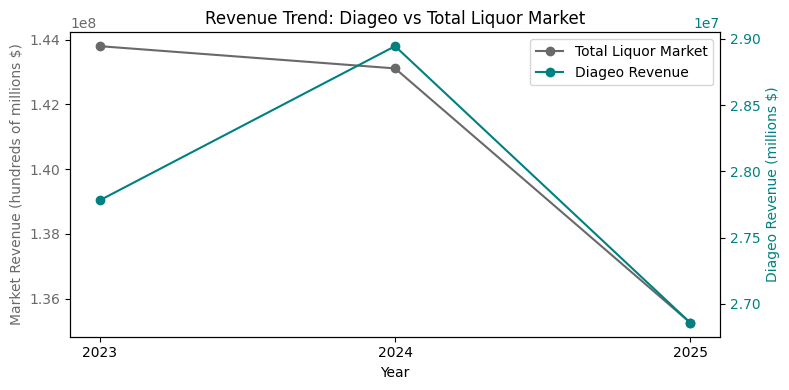

In [7]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(8, 4))

# Plot total market revenue
ax1.plot(
    Total_market_trend['Year'],
    Total_market_trend['Total Liquor Market'],
    marker='o',
    color='dimgray',
    label='Total Liquor Market'
)
ax1.set_ylabel('Market Revenue (hundreds of millions $)', color='dimgray')
ax1.tick_params(axis='y', labelcolor='dimgray')

# Add second y-axis for Diageo
ax2 = ax1.twinx()
ax2.plot(
    Total_market_trend['Year'],
    Total_market_trend['Diageo Revenue'],
    marker='o',
    color='teal',
    label='Diageo Revenue'
)
ax2.set_ylabel('Diageo Revenue (millions $)', color='teal')
ax2.tick_params(axis='y', labelcolor='teal')

# X-axis cleanup
ax1.set_xticks(Total_market_trend['Year'])
ax1.set_xlabel('Year')

# Title and layout
plt.title('Revenue Trend: Diageo vs Total Liquor Market')
fig.tight_layout()

# Add combined legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
plt.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

# Optional grid
plt.grid(True, axis='x', linestyle='--', alpha=0.5)

plt.show()


Both Diageo and the total liquor market experienced a decline in sales during H1 2025, indicating a broader market contraction rather than an issue specific to Diageo.

Next, I analyze temporal patterns and other key dimensions—such as product variants, store performance, and regional breakdowns—to identify the underlying factors driving Diageo's sales trends.

C:\Users\vothk\AppData\Local\Temp\ipykernel_7720\1611815622.py:11: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  growth_rate = pivot_sales.pct_change(axis=1) * 100


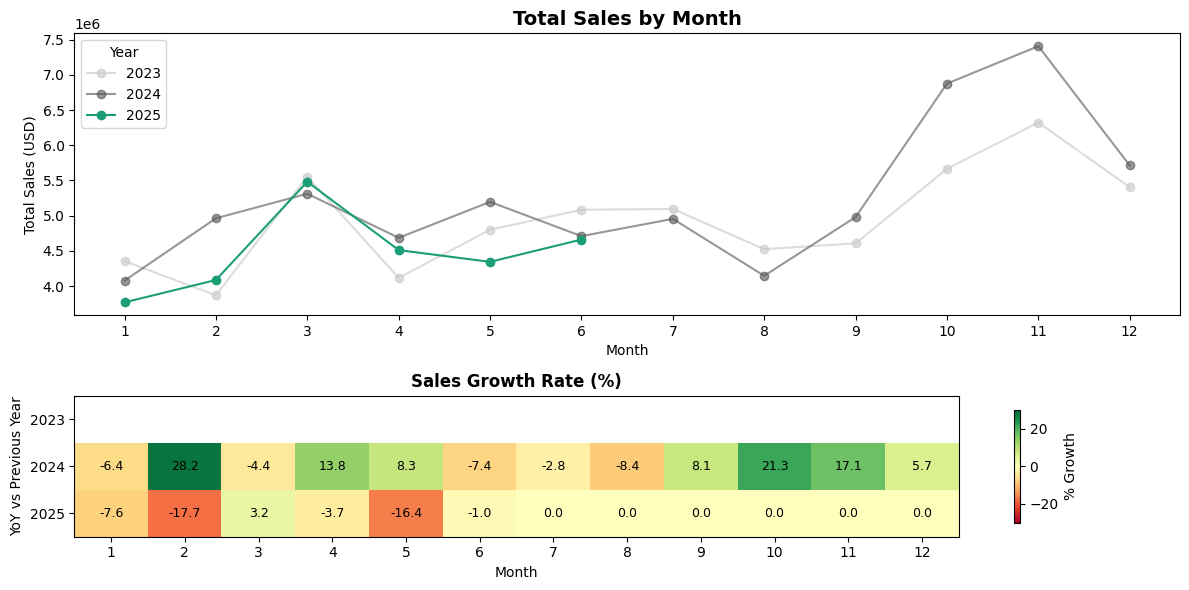

In [8]:
Sale_by_month_year = df_Diageo.groupby(["Month", "Year"]).agg(
    Total_Rev = ("Revenue","sum")
).sort_values(by = "Year", ascending = True).reset_index()

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Pivot for plotting
pivot_sales = Sale_by_month_year.pivot(index='Month', columns='Year', values='Total_Rev')
growth_rate = pivot_sales.pct_change(axis=1) * 100

# Set custom colors
custom_colors = {
    2023: "#ccccccae",   # light gray
    2024: "#5555559C",   # dark gray
    2025: '#1b9e77',
}

# Plot setup
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6), gridspec_kw={'height_ratios': [2, 1]})

# --- Line Chart: Total Sales by Month ---
for year in pivot_sales.columns:
    ax1.plot(
        pivot_sales.index,
        pivot_sales[year],
        marker='o',
        label=str(year),
        color=custom_colors.get(year, 'black')
    )

ax1.set_title("Total Sales by Month", fontsize=14, fontweight='bold')
ax1.set_ylabel("Total Sales (USD)")
ax1.set_xlabel("Month")
ax1.set_xticks(range(1, 13))
ax1.legend(title="Year", loc='upper left')
ax1.grid(False) 

# --- Heatmap: 
im = ax2.imshow(growth_rate.T, cmap='RdYlGn', aspect='auto', vmin=-30, vmax=30)

# Text annotations on heatmap
for i, year in enumerate(growth_rate.columns):
    for j, month in enumerate(growth_rate.index):
        value = growth_rate.loc[month, year]
        text = f"{value:.1f}" if pd.notna(value) else ""
        ax2.text(j, i, text, ha='center', va='center', fontsize=9)

# Axis formatting
ax2.set_title("Sales Growth Rate (%)", fontsize=12, fontweight='bold')
ax2.set_xlabel("Month")
ax2.set_ylabel("YoY vs Previous Year")
ax2.set_xticks(np.arange(len(growth_rate.index)))
ax2.set_xticklabels(growth_rate.index)
ax2.set_yticks(np.arange(len(growth_rate.columns)))
ax2.set_yticklabels(growth_rate.columns)

# Colorbar
cbar = plt.colorbar(im, ax=ax2, orientation='vertical', shrink=0.8)
cbar.set_label('% Growth')

plt.tight_layout()
plt.show()


In 2025, monthly sales performance shows flat to negative growth across most months, with the exception of March and a slight uptick in May. The overall trend remains consistent with 2023 and 2024. Diageo's sales declined in nearly every month, with February and May seeing the most significant drops—approximately 16–17% year-over-year.

From a seasonal perspective, the data indicates that sales typically peak in the later months of the year. This suggests that, with the right strategy, there is still meaningful potential to improve performance in the second half of 2025.

Now I'll check top variants/store/city/county/segment and their contribution to total sale.

### Sale by Variants

In [9]:
Sale_by_variant= df_Diageo[(df_Diageo["Half"]=="H1") & (df_Diageo["Year"].isin({2024, 2025}))].groupby(["Variant", "Year"]).agg(
    Total_Rev = ("Revenue","sum")
).sort_values(by = ["Year","Total_Rev"], ascending=[True, False]).reset_index()

Sale_by_variant_pivot = Sale_by_variant.pivot(
    index = "Variant",
    columns = "Year",
    values = "Total_Rev"
).sort_values(by = 2025, ascending = False).reset_index()

Sale_by_variant_pivot["%_Contribution"] = round((Sale_by_variant_pivot[2025]/(Sale_by_variant_pivot[2025].sum()))*100, 2)
Sale_by_variant_pivot["YoY_Growth"] = round(((Sale_by_variant_pivot[2025] - Sale_by_variant_pivot[2024])/Sale_by_variant_pivot[2024])*100, 2)

Sale_by_variant_pivot.head(20)

Year,Variant,2024,2025,%_Contribution,YoY_Growth
0,Crown Royal Regal Apple,3018992.36,2839559.04,10.57,-5.94
1,Crown Royal,2934226.12,2819465.95,10.50,-3.91
2,Captain Morgan Original Spiced,2669781.28,2623004.20,9.77,-1.75
3,Captain Morgan Original Spiced Barrel,2172588.93,1869117.12,6.96,-13.97
4,Crown Royal Blackberry,1916099.46,1346781.63,5.01,-29.71
5,Crown Royal Peach,1635652.17,1307363.67,4.87,-20.07
6,Don Julio Reposado,543082.66,1056965.78,3.94,94.62
7,Smirnoff 80Prf Pet,853110.25,957624.00,3.57,12.25
8,Smirnoff 80Prf,775348.55,736024.22,2.74,-5.07
9,Don Julio Blanco,768050.49,699204.73,2.60,-8.96


Diageo's sales are highly concentrated: the top 5 variants account for ~40% of total revenue, and the top 20 variants contribute ~80%, indicating strong consumer preference for a select few SKUs rather than a fragmented market. This concentration presents an opportunity to double down on core variants while strategically expanding the reach of other top performers.

Diageo's top 3 revenue-driving variants — Crown Royal Regal Apple (10.6%), Crown Royal (10.5%), and Captain Morgan Original Spiced (9.8%) — all saw YoY declines (–1.8% to –5.9%), contributing significantly to the overall drop.

Flavored SKUs like Crown Royal Blackberry (–29.7%), Peach (–20.1%), and Spiced Barrel (–14.0%) also underperformed. While Don Julio Reposado (+94.6%) and Smirnoff 80Prf Pet (+12.3%) showed strong growth, their contributions remain relatively small.

-> Core variants witnessed decline YoY. Despite promising growth in tequila and vodka, recovery efforts must focus on stabilizing top-performing SKUs.

### Sale by Category

In [10]:
# Calculate Diageo sale by category by year and YoY growth
Sale_by_category_Diageo = df_Diageo[(df_Diageo["Half"]=="H1") & (df_Diageo["Year"].isin({2024, 2025}))].groupby(["Alcohol Type", "Year"]).agg(
    Total_Rev = ("Revenue","sum")
).sort_values(by = ["Year","Total_Rev"], ascending=[True, False]).reset_index()

Sale_by_category_Diageo_pivot = Sale_by_category_Diageo.pivot(
    index = "Alcohol Type",
    columns = "Year",
    values = "Total_Rev"
).sort_values(by = 2025, ascending = False).reset_index()

Sale_by_category_Diageo_pivot["%_Contribution"] = round((Sale_by_category_Diageo_pivot[2025]/(Sale_by_category_Diageo_pivot[2025].sum()))*100, 2)
Sale_by_category_Diageo_pivot["Diageo_YoY_Growth"] = round(((Sale_by_category_Diageo_pivot[2025] - Sale_by_category_Diageo_pivot[2024])/Sale_by_category_Diageo_pivot[2024])*100, 2)

# Calculate market sale by category by year and YoY growth
Market_sale_by_category = df_clean[(df_clean["Half"]=="H1") & (df_clean["Year"].isin({2024, 2025}))].groupby(["Alcohol Type", "Year"]).agg(
    Total_Rev = ("Revenue","sum")
).sort_values(by = ["Year","Total_Rev"], ascending=[True, False]).reset_index()

Market_sale_by_category_pivot = Market_sale_by_category.pivot(
    index = "Alcohol Type",
    columns = "Year",
    values = "Total_Rev"
).sort_values(by = 2025, ascending = False).reset_index()

Market_sale_by_category_pivot["%_Contribution"] = round((Market_sale_by_category_pivot[2025]/(Market_sale_by_category_pivot[2025].sum()))*100, 2)
Market_sale_by_category_pivot["Market_YoY_Growth"] = round(((Market_sale_by_category_pivot[2025] - Market_sale_by_category_pivot[2024])/Market_sale_by_category_pivot[2024])*100, 2)
Market_yoy = Market_sale_by_category_pivot[["Alcohol Type", "Market_YoY_Growth"]]

# Merge 2 tables
Sale_by_category = pd.merge(Sale_by_category_Diageo_pivot, Market_yoy, how = "inner", on = "Alcohol Type" )
Sale_by_category.head(10)

Year,Alcohol Type,2024,2025,%_Contribution,Diageo_YoY_Growth,Market_YoY_Growth
0,Whiskey,11841735.33,10263986.65,38.22,-13.32,-6.34
1,Rum,5662629.40,5244761.93,19.53,-7.38,-7.52
2,Tequila & Mezcal,3388754.07,3578314.22,13.32,5.59,-3.17
3,Vodka,3597941.98,3539310.09,13.18,-1.63,-3.85
4,Others,1844251.11,1482745.81,5.52,-19.60,-10.63
5,Liqueur,828635.33,841528.38,3.13,1.56,-5.55
6,Gin,867380.61,802597.02,2.99,-7.47,-7.64
7,Schnapps,662787.18,698249.11,2.60,5.35,3.80
8,Ready-to-Drink/Cocktails,173914.97,342515.83,1.28,96.94,14.43
9,Spirits,69163.49,55567.80,0.21,-19.66,-14.49


Về category, Whiskey là key category của Diageo khi chiếm đến 38% total sale. Tuy nhiên cate này đang phải đối mặt với sự sụt giảm sale so với 2024 yoy, điều này có thể là giảm vì trend chung của thị trường - đến từ shift trong interest của người tiêu dùng cũng như sự shrinking của ngành liquor nói chung. Nhưng cũng để lại 1 nguy cơ là nguy cơ mất share khi Diageo giảm đến 13% trong khi thị trường chỉ giảm 6%.

Các category quan trọng khác như Rum, tequila, Vodka - những category chiếm từ 13 - 19% contribution to total sale cũng ghi nhận sự sụt giảm ngoại trừ tequila. Tequila của Diageo đang làm tốt so với thị trường khi hầu như các cate top đều ghi nhận sự sụt giảm nhưng Tequila của Diageo cho thấy positive sign.

1 rising star khác cần để ý là ready-to-drink/Cocktails ghi nhận đến 96% growth cho Diageo và tăng 14% toàn thị trường, dù penetration của cate này còn nhỏ nhưng sự tăng trưởng cho thấy sự interest của người tiêu dùng dành cho cate này ngày càng cao -> potential để expand và cross sell với các cate khác. 1 số hành động có thể làm như là giới thiệu kèm khi communicate với các store.

Vậy câu hỏi remain ở phần này là:
- Đối với các cate core và giảm bao gồm Whiskey, Rum và Vodka: Đang giảm ở đâu - variant nào, khu vực nào? Có đối thủ nào đang mạnh lên ở cate core này hay không?
- Đối với các cate đang tăng như Tequila và Ready - to - drink: Đang tăng ở đâu - variant nào, khu vực nào? Ai là đối thủ chính?

#### Whiskey

Đối với whiskey - cate quan trọng nhất, tôi sẽ tiến hành xem sự sụt giảm của whiskey là giảm variant nào, khu vực nào, liệu chúng ta có đang bị mất share với đối thủ nào hay không?

In [11]:
category_to_check = "Whiskey"  
# ----------------- VARIANT ----------------- #
variant_total_rev = df_Diageo[(df_Diageo["Half"] == "H1") & 
                              (df_Diageo["Year"].isin([2025])) & 
                              (df_Diageo["Alcohol Type"] == category_to_check)
                             ].groupby("Variant").agg(
    Total_Rev_2025 = ("Revenue", "sum")
).sort_values(by="Total_Rev_2025", ascending=False).head(20).reset_index()

top_variants = variant_total_rev["Variant"].tolist()

variant_yoy = df_Diageo[(df_Diageo["Half"] == "H1") & 
                        (df_Diageo["Year"].isin([2024, 2025])) & 
                        (df_Diageo["Alcohol Type"] == category_to_check) & 
                        (df_Diageo["Variant"].isin(top_variants))
                       ].groupby(["Variant", "Year"]).agg(
    Total_Rev = ("Revenue", "sum")
).reset_index()

variant_pivot = variant_yoy.pivot(index="Variant", columns="Year", values="Total_Rev").fillna(0)
variant_pivot["%_Contribution"] = round((variant_pivot[2025] /(variant_pivot[2025].sum())) * 100, 2)
variant_pivot["YoY_Growth"] = round(((variant_pivot[2025] - variant_pivot[2024]) / variant_pivot[2024]) * 100, 2)
variant_pivot = variant_pivot.sort_values(by="YoY_Growth")  

# ----------------- STORE ----------------- #
store_total_rev = df_Diageo[(df_Diageo["Half"] == "H1") & 
                           (df_Diageo["Year"].isin([2025])) & 
                           (df_Diageo["Alcohol Type"] == category_to_check)
                          ].groupby("Store Name").agg(
    Total_Rev_2025 = ("Revenue", "sum")
).sort_values(by="Total_Rev_2025", ascending=False).head(20).reset_index()

top_stores = store_total_rev["Store Name"].tolist()

store_yoy = df_Diageo[(df_Diageo["Half"] == "H1") & 
                     (df_Diageo["Year"].isin([2024, 2025])) & 
                     (df_Diageo["Alcohol Type"] == category_to_check) & 
                     (df_Diageo["Store Name"].isin(top_stores))
                    ].groupby(["Store Name", "Year"]).agg(
    Total_Rev = ("Revenue", "sum")
).reset_index()

store_pivot = store_yoy.pivot(index="Store Name", columns="Year", values="Total_Rev").fillna(0)
store_pivot["%_Contribution"] = round((store_pivot[2025] /(store_pivot[2025].sum())) * 100, 2)
store_pivot["YoY_Growth"] = round(((store_pivot[2025] - store_pivot[2024]) / store_pivot[2024]) * 100, 2)
store_pivot = store_pivot.sort_values(by="YoY_Growth")

# ----------------- DISPLAY ----------------- #
display(variant_pivot.sort_values(by = "%_Contribution", ascending = False).head(10)) # % Growth yoy of top 10 variants
display(store_pivot.sort_values(by = "%_Contribution", ascending = False).head(10))  # % Growth yoy of top 10 stores

Year,2024,2025,%_Contribution,YoY_Growth
Variant,,,,
Crown Royal Regal Apple,3018992.36,2839559.04,28.74,-5.94
Crown Royal,2934226.12,2819465.95,28.54,-3.91
Crown Royal Peach,1635652.17,1307363.67,13.23,-20.07
Seagrams 7 Crown,719117.06,633455.76,6.41,-11.91
Bulleit Bourbon,609671.00,605135.80,6.13,-0.74
Crown Royal Vanilla,345950.40,299490.69,3.03,-13.43
Johnnie Walker Black,219752.29,208415.70,2.11,-5.16
Johnnie Walker Red,203325.84,169934.45,1.72,-16.42
Bulleit 95 Rye,127571.18,143430.46,1.45,12.43


Year,2024,2025,%_Contribution,YoY_Growth
Store Name,,,,
Hy-Vee #3 / Bdi / Des Moines,453597.22,416680.34,19.41,-8.14
Central City 2,351832.28,308281.01,14.36,-12.38
Another Round / Dewitt,186570.80,184641.75,8.60,-1.03
I-80 Liquor / Council Bluffs,171537.95,157442.25,7.34,-8.22
Benz Distributing,122050.91,121458.71,5.66,-0.49
Wall To Wall Wine And Spirits / West Des Moines,73846.85,98425.99,4.59,33.28
Hy-Vee Wine And Spirits #1 (1281) / Iowa City,90103.35,83860.61,3.91,-6.93
Wilkie Liquors,89961.81,81226.87,3.78,-9.71
Sam'S Club 6344 / Windsor Heights,84048.90,73655.22,3.43,-12.37


In [12]:
# Filter Whiskey H1 data
df_whiskey = df_clean[
    (df_clean["Half"] == "H1") & 
    (df_clean["Year"].isin([2024, 2025])) & 
    (df_clean["Alcohol Type"] == "Whiskey") & 
    (df_clean["Manufacturer Name"].notna())
]

# Calculate share in whiskey category by year
total_whiskey_rev = df_whiskey.groupby("Year")["Revenue"].sum()

rev_by_manu = df_whiskey.groupby(["Manufacturer Name", "Year"]).agg(
    Total_Rev=("Revenue", "sum")
).reset_index()

manu_pivot = rev_by_manu.pivot(index="Manufacturer Name", columns="Year", values="Total_Rev").fillna(0)

manu_pivot["2024_Share"] = round((manu_pivot[2024] / total_whiskey_rev[2024]) * 100, 2)
manu_pivot["2025_Share"] = round((manu_pivot[2025] / total_whiskey_rev[2025]) * 100, 2)
manu_pivot["%_Contribution"] = round((manu_pivot[2025] /(manu_pivot[2025].sum())) * 100, 2)

manu_pivot["Share_Change"] = manu_pivot["2025_Share"] - manu_pivot["2024_Share"]

# Only show top 10 manufacturer since they are the main players and have big impact to the market
top10_2024 = manu_pivot.sort_values(by=2024, ascending=False).head(10)
top_gain = top10_2024.sort_values(by="Share_Change", ascending=False)
display(top_gain[["2024_Share", "2025_Share", "Share_Change"]].head(10))


Year,2024_Share,2025_Share,Share_Change
Manufacturer Name,,,
Sazerac Company Inc,21.68,22.79,1.11
Jim Beam Brands,11.53,12.33,0.80
Pernod Ricard Usa,6.10,6.38,0.28
Cedar Ridge Vineyards Ll,1.39,1.56,0.17
Brown Forman Corp.,10.83,10.98,0.15
Campari America,0.99,0.98,-0.01
Luxco Inc,1.11,1.05,-0.06
Kirin Beer & Spirits Of America Inc / Four Roses Distillery,1.33,1.22,-0.11
Heaven Hill Brands,12.51,11.82,-0.69


From the data, we can see that the decline in the whiskey category spans across top variants and high-contribution stores. Diageo’s share in this category dropped by 1.64% YoY, while Sazerac and Jim Beam—two major competitors—are steadily gaining share. This is a clear signal that we need to keep a close eye on these competitors moving forward.

Action Implications:
At the variant and store level, Diageo needs a clear plan to regain share in key regions. That requires understanding:

Which SKUs are declining by store/region

Which competitors are gaining in those areas

What potential substitute or cross-sell products we can activate

→ This highlights the urgent need for more granular sales control by variant and store.

This issue will be addressed in Section II, where I’ll introduce a tool designed to monitor and control sales performance at the variant-store level.

#### Rum

Tương tự như Whiskey, tôi sẽ investigate động lực dẫn đến sự sụt giảm của category Rum thông qua việc xem xét:
- % giảm của top variants trong cate Rum
- % giảm của top store trong cate Rum
- Liệu có đối thủ nào đang giành mất thị phần của Diageo hay không

In [13]:
category_to_check = "Rum"  
# ----------------- VARIANT ----------------- #
variant_total_rev = df_Diageo[(df_Diageo["Half"] == "H1") & 
                              (df_Diageo["Year"].isin([2025])) & 
                              (df_Diageo["Alcohol Type"] == category_to_check)
                             ].groupby("Variant").agg(
    Total_Rev_2025 = ("Revenue", "sum")
).sort_values(by="Total_Rev_2025", ascending=False).head(20).reset_index()

top_variants = variant_total_rev["Variant"].tolist()

variant_yoy = df_Diageo[(df_Diageo["Half"] == "H1") & 
                        (df_Diageo["Year"].isin([2024, 2025])) & 
                        (df_Diageo["Alcohol Type"] == category_to_check) & 
                        (df_Diageo["Variant"].isin(top_variants))
                       ].groupby(["Variant", "Year"]).agg(
    Total_Rev = ("Revenue", "sum")
).reset_index()

variant_pivot = variant_yoy.pivot(index="Variant", columns="Year", values="Total_Rev").fillna(0)
variant_pivot["%_Contribution"] = round((variant_pivot[2025] /(variant_pivot[2025].sum())) * 100, 2)
variant_pivot["YoY_Growth"] = round(((variant_pivot[2025] - variant_pivot[2024]) / variant_pivot[2024]) * 100, 2)
variant_pivot = variant_pivot.sort_values(by="YoY_Growth")  

# ----------------- STORE ----------------- #
store_total_rev = df_Diageo[(df_Diageo["Half"] == "H1") & 
                           (df_Diageo["Year"].isin([2025])) & 
                           (df_Diageo["Alcohol Type"] == category_to_check)
                          ].groupby("Store Name").agg(
    Total_Rev_2025 = ("Revenue", "sum")
).sort_values(by="Total_Rev_2025", ascending=False).head(20).reset_index()

top_stores = store_total_rev["Store Name"].tolist()

store_yoy = df_Diageo[(df_Diageo["Half"] == "H1") & 
                     (df_Diageo["Year"].isin([2024, 2025])) & 
                     (df_Diageo["Alcohol Type"] == category_to_check) & 
                     (df_Diageo["Store Name"].isin(top_stores))
                    ].groupby(["Store Name", "Year"]).agg(
    Total_Rev = ("Revenue", "sum")
).reset_index()

store_pivot = store_yoy.pivot(index="Store Name", columns="Year", values="Total_Rev").fillna(0)
store_pivot["%_Contribution"] = round((store_pivot[2025] /(store_pivot[2025].sum())) * 100, 2)
store_pivot["YoY_Growth"] = round(((store_pivot[2025] - store_pivot[2024]) / store_pivot[2024]) * 100, 2)
store_pivot = store_pivot.sort_values(by="YoY_Growth")

# ----------------- DISPLAY ----------------- #
display(variant_pivot.sort_values(by = "%_Contribution", ascending = False).head(10)) # % Growth yoy of top 10 variants
display(store_pivot.sort_values(by = "%_Contribution", ascending = False).head(10))  # % Growth yoy of top 10 stores

Year,2024,2025,%_Contribution,YoY_Growth
Variant,,,,
Captain Morgan Original Spiced,2669781.28,2623004.20,50.01,-1.75
Captain Morgan Original Spiced Barrel,2172588.93,1869117.12,35.64,-13.97
Captain Morgan Original Spiced Pet,297265.40,250532.75,4.78,-15.72
Captain Morgan Original Spiced Mini,186619.20,188995.20,3.60,1.27
Captain Morgan Private Stock,129577.92,92441.55,1.76,-28.66
Captain Morgan 100Prf Spiced Rum,73808.84,62610.03,1.19,-15.17
Captain Morgan Sweet Chili Lime,0.00,47544.90,0.91,inf
Captain Morgan Sliced Apple,42249.48,27454.57,0.52,-35.02
Captain Morgan White,27629.70,20270.04,0.39,-26.64


Year,2024,2025,%_Contribution,YoY_Growth
Store Name,,,,
Hy-Vee #3 / Bdi / Des Moines,197300.82,182960.72,16.13,-7.27
Central City 2,147357.54,136402.52,12.02,-7.43
Another Round / Dewitt,127166.40,109627.68,9.66,-13.79
Benz Distributing,75280.99,77699.35,6.85,3.21
I-80 Liquor / Council Bluffs,63014.76,73765.83,6.50,17.06
Hy-Vee Wine And Spirits #1 (1281) / Iowa City,53571.48,58536.84,5.16,9.27
Wilkie Liquors,59739.66,54505.14,4.80,-8.76
Hy-Vee #3 Food & Drugstore / Davenport,18156.90,43837.74,3.86,141.44
Happy'S Wine & Spirits Wholesale,36749.27,39749.40,3.50,8.16


In [14]:
# Filter Rum H1 data
df_rum = df_clean[
    (df_clean["Half"] == "H1") & 
    (df_clean["Year"].isin([2024, 2025])) & 
    (df_clean["Alcohol Type"] == "Rum") & 
    (df_clean["Manufacturer Name"].notna())
]

# Calculate share in whiskey category by year
total_rum_rev = df_rum.groupby("Year")["Revenue"].sum()

rev_by_manu = df_rum.groupby(["Manufacturer Name", "Year"]).agg(
    Total_Rev=("Revenue", "sum")
).reset_index()

manu_pivot = rev_by_manu.pivot(index="Manufacturer Name", columns="Year", values="Total_Rev").fillna(0)

manu_pivot["2024_Share"] = round((manu_pivot[2024] / total_rum_rev[2024]) * 100, 2)
manu_pivot["2025_Share"] = round((manu_pivot[2025] / total_rum_rev[2025]) * 100, 2)
manu_pivot["%_Contribution"] = round((manu_pivot[2025] /(manu_pivot[2025].sum())) * 100, 2)

manu_pivot["Share_Change"] = manu_pivot["2025_Share"] - manu_pivot["2024_Share"]

# Only show top 10 manufacturer since they are the main players and have big impact to the market
top10_2024 = manu_pivot.sort_values(by=2024, ascending=False).head(10)
top_gain = top10_2024.sort_values(by="Share_Change", ascending=False)
display(top_gain[["2024_Share", "2025_Share", "Share_Change"]].head(10))


Year,2024_Share,2025_Share,Share_Change
Manufacturer Name,,,
Heaven Hill Brands,8.51,8.77,0.26
Sazerac Company Inc,3.02,3.17,0.15
Diageo Americas,47.28,47.35,0.07
Proximo,1.04,1.02,-0.02
Bacardi Usa Inc,15.72,15.69,-0.03
Luxco Inc,3.22,3.14,-0.08
William Grant & Sons Inc,1.00,0.91,-0.09
"Sovereign Brands, Llc",0.81,0.71,-0.10
Jim Beam Brands,1.84,1.61,-0.23


Sự sụt giảm Sale của Diageo trong cate Rum trải dài across các key variant và giảm ở 1 số store trong khi ghi nhận mức tăng trưởng ở một số store. Điểm sáng ở cate này là sự sụt giảm đơn thuần đến từ sự shrinking của market chứ không phải share loosing potential khi mà Diageo ghi nhận mức tăng share nhẹ within cate so với cùng kỳ năm trước.

#### Vodka

Tương tự, với cate Vodka tôi sẽ investigate:
- % giảm của top variants trong cate Rum
- % giảm của top store trong cate Rum
- Liệu có đối thủ nào đang giành mất thị phần của Diageo hay không

In [15]:
category_to_check = "Vodka"  
# ----------------- VARIANT ----------------- #
variant_total_rev = df_Diageo[(df_Diageo["Half"] == "H1") & 
                              (df_Diageo["Year"].isin([2025])) & 
                              (df_Diageo["Alcohol Type"] == category_to_check)
                             ].groupby("Variant").agg(
    Total_Rev_2025 = ("Revenue", "sum")
).sort_values(by="Total_Rev_2025", ascending=False).head(20).reset_index()

top_variants = variant_total_rev["Variant"].tolist()

variant_yoy = df_Diageo[(df_Diageo["Half"] == "H1") & 
                        (df_Diageo["Year"].isin([2024, 2025])) & 
                        (df_Diageo["Alcohol Type"] == category_to_check) & 
                        (df_Diageo["Variant"].isin(top_variants))
                       ].groupby(["Variant", "Year"]).agg(
    Total_Rev = ("Revenue", "sum")
).reset_index()

variant_pivot = variant_yoy.pivot(index="Variant", columns="Year", values="Total_Rev").fillna(0)
variant_pivot["%_Contribution"] = round((variant_pivot[2025] /(variant_pivot[2025].sum())) * 100, 2)
variant_pivot["YoY_Growth"] = round(((variant_pivot[2025] - variant_pivot[2024]) / variant_pivot[2024]) * 100, 2)
variant_pivot = variant_pivot.sort_values(by="YoY_Growth")  

# ----------------- STORE ----------------- #
store_total_rev = df_Diageo[(df_Diageo["Half"] == "H1") & 
                           (df_Diageo["Year"].isin([2025])) & 
                           (df_Diageo["Alcohol Type"] == category_to_check)
                          ].groupby("Store Name").agg(
    Total_Rev_2025 = ("Revenue", "sum")
).sort_values(by="Total_Rev_2025", ascending=False).head(20).reset_index()

top_stores = store_total_rev["Store Name"].tolist()

store_yoy = df_Diageo[(df_Diageo["Half"] == "H1") & 
                     (df_Diageo["Year"].isin([2024, 2025])) & 
                     (df_Diageo["Alcohol Type"] == category_to_check) & 
                     (df_Diageo["Store Name"].isin(top_stores))
                    ].groupby(["Store Name", "Year"]).agg(
    Total_Rev = ("Revenue", "sum")
).reset_index()

store_pivot = store_yoy.pivot(index="Store Name", columns="Year", values="Total_Rev").fillna(0)
store_pivot["%_Contribution"] = round((store_pivot[2025] /(store_pivot[2025].sum())) * 100, 2)
store_pivot["YoY_Growth"] = round(((store_pivot[2025] - store_pivot[2024]) / store_pivot[2024]) * 100, 2)
store_pivot = store_pivot.sort_values(by="YoY_Growth")

# ----------------- DISPLAY ----------------- #
display(variant_pivot.sort_values(by = "%_Contribution", ascending = False).head(10)) # % Growth yoy of top 10 variants
display(store_pivot.sort_values(by = "%_Contribution", ascending = False).head(10))  # % Growth yoy of top 10 stores

Year,2024,2025,%_Contribution,YoY_Growth
Variant,,,,
Smirnoff 80Prf Pet,853110.25,957624.00,30.74,12.25
Smirnoff 80Prf,775348.55,736024.22,23.63,-5.07
Ketel One,464425.83,482938.82,15.50,3.99
Smirnoff 80Prf Mini,129424.22,117845.43,3.78,-8.95
"Smirnoff Red, White & Berry",113197.75,103677.25,3.33,-8.41
Smirnoff Raspberry,97411.50,100424.50,3.22,3.09
Smirnoff Vanilla,68698.50,92730.00,2.98,34.98
Smirnoff Strawberry,64646.75,72189.25,2.32,11.67
Smirnoff Kissed Caramel,68829.75,49714.50,1.60,-27.77


Year,2024,2025,%_Contribution,YoY_Growth
Store Name,,,,
Central City 2,163217.23,165197.25,19.63,1.21
Hy-Vee #3 / Bdi / Des Moines,151329.58,138271.72,16.43,-8.63
Wall To Wall Wine And Spirits / West Des Moines,34080.96,75720.66,9.00,122.18
Hy-Vee Wine And Spirits #1 (1281) / Iowa City,35848.59,41666.85,4.95,16.23
Benz Distributing,21013.58,38212.16,4.54,81.85
Hy-Vee #2 (1018) / Ames,24659.97,33139.59,3.94,34.39
Hy-Vee Food Store (1148) / Fleur / Dsm,26889.36,32056.64,3.81,19.22
Hy-Vee / Waukee,25712.16,30416.71,3.61,18.30
Hy-Vee #4 / Wdm,27809.31,30319.10,3.60,9.02


In [16]:
# Filter Vodka H1 data
df_vodka = df_clean[
    (df_clean["Half"] == "H1") & 
    (df_clean["Year"].isin([2024, 2025])) & 
    (df_clean["Alcohol Type"] == "Vodka") & 
    (df_clean["Manufacturer Name"].notna())
]

# Calculate share in whiskey category by year
total_vodka_rev = df_vodka.groupby("Year")["Revenue"].sum()

rev_by_manu = df_vodka.groupby(["Manufacturer Name", "Year"]).agg(
    Total_Rev=("Revenue", "sum")
).reset_index()

manu_pivot = rev_by_manu.pivot(index="Manufacturer Name", columns="Year", values="Total_Rev").fillna(0)

manu_pivot["2024_Share"] = round((manu_pivot[2024] / total_vodka_rev[2024]) * 100, 2)
manu_pivot["2025_Share"] = round((manu_pivot[2025] / total_vodka_rev[2025]) * 100, 2)
manu_pivot["%_Contribution"] = round((manu_pivot[2025] /(manu_pivot[2025].sum())) * 100, 2)

manu_pivot["Share_Change"] = manu_pivot["2025_Share"] - manu_pivot["2024_Share"]

# Only show top 10 manufacturer since they are the main players and have big impact to the market
top10_2024 = manu_pivot.sort_values(by=2024, ascending=False).head(10)
top_gain = top10_2024.sort_values(by="Share_Change", ascending=False)
display(top_gain[["2024_Share", "2025_Share", "Share_Change"]].head(10))


Year,2024_Share,2025_Share,Share_Change
Manufacturer Name,,,
Sazerac Company Inc,10.57,13.83,3.26
Diageo Americas,11.75,12.02,0.27
Mccormick Distilling Co.,3.91,3.98,0.07
Bacardi Usa Inc,2.99,2.98,-0.01
E & J Gallo Winery,4.56,4.49,-0.07
Luxco Inc,6.40,6.26,-0.14
Pernod Ricard Usa,5.86,5.67,-0.19
Constellation Brands Inc,2.02,0.00,-2.02
Phillips Beverage,3.32,1.24,-2.08


Có thể thấy sự sụt giảm nhẹ trong doanh số của Vodka đến từ sự sụt giảm của SKU Smirnoff 80Prf cả bản bình thường và bản mini, về store thì sale trong 2 store chính - Hy-Vee Wine And Spirits / Wdm và Hy-Vee #3 / Bdi / Des Moines. Ở cate Vodka này chúng ta có thể thấy sự trỗi dậy của Sazerac khi tăng share đến 3% so với cùng kỳ -> Caution with Sazerac.

Từ đây chúng ta có thể thấy đối với cate vodka cũng cần phải control SKUs và Store để đảm bảo giảm down sale ở các variants và store quan trọng cũng như control để gain nhiều thị phần hơn khi mà Sazera đang ngày càng phát triển -> Cần một công cụ để control SkUs và Store mà chúng ta sẽ phát triển trong phần 2

#### Tequila

Đối với 1 cate đang lên như Tequila, tôi sẽ kiểm tra:
- Các SKUs đang tăng và mức độ contribution của SKUs đó to Tequila category
- Các store chủ lực của Diageo Tequila và yoy growth của store
- Diageo position trong cate tequila so với thị trường

In [17]:
category_to_check = "Tequila & Mezcal"
# ----------------- VARIANT ----------------- #
variant_total_rev = df_Diageo[(df_Diageo["Half"] == "H1") & 
                              (df_Diageo["Year"].isin([2025])) & 
                              (df_Diageo["Alcohol Type"] == category_to_check)
                             ].groupby("Variant").agg(
    Total_Rev_2025 = ("Revenue", "sum")
).sort_values(by="Total_Rev_2025", ascending=False).head(20).reset_index()

top_variants = variant_total_rev["Variant"].tolist()

variant_yoy = df_Diageo[(df_Diageo["Half"] == "H1") & 
                        (df_Diageo["Year"].isin([2024, 2025])) & 
                        (df_Diageo["Alcohol Type"] == category_to_check) & 
                        (df_Diageo["Variant"].isin(top_variants))
                       ].groupby(["Variant", "Year"]).agg(
    Total_Rev = ("Revenue", "sum")
).reset_index()

variant_pivot = variant_yoy.pivot(index="Variant", columns="Year", values="Total_Rev").fillna(0)
variant_pivot["%_Contribution"] = round((variant_pivot[2025] /(variant_pivot[2025].sum())) * 100, 2)
variant_pivot["YoY_Growth"] = round(((variant_pivot[2025] - variant_pivot[2024]) / variant_pivot[2024]) * 100, 2)
variant_pivot = variant_pivot.sort_values(by="YoY_Growth")  

# ----------------- STORE ----------------- #
store_total_rev = df_Diageo[(df_Diageo["Half"] == "H1") & 
                           (df_Diageo["Year"].isin([2025])) & 
                           (df_Diageo["Alcohol Type"] == category_to_check)
                          ].groupby("Store Name").agg(
    Total_Rev_2025 = ("Revenue", "sum")
).sort_values(by="Total_Rev_2025", ascending=False).head(20).reset_index()

top_stores = store_total_rev["Store Name"].tolist()

store_yoy = df_Diageo[(df_Diageo["Half"] == "H1") & 
                     (df_Diageo["Year"].isin([2024, 2025])) & 
                     (df_Diageo["Alcohol Type"] == category_to_check) & 
                     (df_Diageo["Store Name"].isin(top_stores))
                    ].groupby(["Store Name", "Year"]).agg(
    Total_Rev = ("Revenue", "sum")
).reset_index()

store_pivot = store_yoy.pivot(index="Store Name", columns="Year", values="Total_Rev").fillna(0)
store_pivot["%_Contribution"] = round((store_pivot[2025] /(store_pivot[2025].sum())) * 100, 2)
store_pivot["YoY_Growth"] = round(((store_pivot[2025] - store_pivot[2024]) / store_pivot[2024]) * 100, 2)
store_pivot = store_pivot.sort_values(by="YoY_Growth")

# ----------------- DISPLAY ----------------- #
display(variant_pivot.sort_values(by = "%_Contribution", ascending = False).head(10)) # % Growth yoy of top 10 variants
display(store_pivot.sort_values(by = "%_Contribution", ascending = False).head(10))  # % Growth yoy of top 10 stores

Year,2024,2025,%_Contribution,YoY_Growth
Variant,,,,
Don Julio Reposado,543082.66,1056965.78,30.30,94.62
Don Julio Blanco,768050.49,699204.73,20.04,-8.96
Don Julio Anejo,356441.45,412326.04,11.82,15.68
Casamigos Blanco,551193.49,387979.83,11.12,-29.61
Casamigos Reposado,321174.64,206161.04,5.91,-35.81
Don Julio 70Th Anniversary,195403.95,160556.00,4.60,-17.83
Astral Tequila,40460.88,130468.95,3.74,222.46
Don Julio 1942,166556.70,128822.82,3.69,-22.66
Astral Reposado,12979.20,44665.92,1.28,244.13


Year,2024,2025,%_Contribution,YoY_Growth
Store Name,,,,
Hy-Vee #3 / Bdi / Des Moines,340318.18,274339.35,20.33,-19.39
Central City 2,282111.45,252543.03,18.72,-10.48
Another Round / Dewitt,123862.44,106611.00,7.90,-13.93
Benz Distributing,94779.72,92202.32,6.83,-2.72
Hy-Vee Wine And Spirits #1 (1281) / Iowa City,65387.57,59389.12,4.40,-9.17
Sam'S Club 6344 / Windsor Heights,49621.62,57101.04,4.23,15.07
I-80 Liquor / Council Bluffs,48473.32,56427.58,4.18,16.41
"Central City Liquor, Inc.",27936.75,54533.70,4.04,95.20
H & A Mini Mart,41820.80,47683.56,3.53,14.02


In [18]:
# Filter tequila H1 data
df_tequila = df_clean[
    (df_clean["Half"] == "H1") & 
    (df_clean["Year"].isin([2024, 2025])) & 
    (df_clean["Alcohol Type"] == "Tequila & Mezcal") & 
    (df_clean["Manufacturer Name"].notna())
]

# Calculate share in whiskey category by year
total_tequila_rev = df_tequila.groupby("Year")["Revenue"].sum()

rev_by_manu = df_tequila.groupby(["Manufacturer Name", "Year"]).agg(
    Total_Rev=("Revenue", "sum")
).reset_index()

manu_pivot = rev_by_manu.pivot(index="Manufacturer Name", columns="Year", values="Total_Rev").fillna(0)

manu_pivot["2024_Share"] = round((manu_pivot[2024] / total_tequila_rev[2024]) * 100, 2)
manu_pivot["2025_Share"] = round((manu_pivot[2025] / total_tequila_rev[2025]) * 100, 2)
manu_pivot["%_Contribution"] = round((manu_pivot[2025] /(manu_pivot[2025].sum())) * 100, 2)

manu_pivot["Share_Change"] = manu_pivot["2025_Share"] - manu_pivot["2024_Share"]

# Only show top 10 manufacturer since they are the main players and have big impact to the market
top10_2024 = manu_pivot.sort_values(by=2024, ascending=False).head(10)
top_gain = top10_2024.sort_values(by="Share_Change", ascending=False)
display(top_gain[["2024_Share", "2025_Share", "Share_Change"]].head(10))


Year,2024_Share,2025_Share,Share_Change
Manufacturer Name,,,
Diageo Americas,22.01,24.01,2.00
Campari America,2.33,3.19,0.86
"Mast-Jagermeister Us, Inc",4.29,4.87,0.58
Sazerac Company Inc,6.54,6.82,0.28
William Grant & Sons Inc,1.71,1.91,0.20
Pernod Ricard Usa,3.02,2.52,-0.50
Jim Beam Brands,5.51,5.00,-0.51
Luxco Inc,5.44,4.55,-0.89
Proximo,23.22,22.14,-1.08


Mức tăng 5% của cate Tequila chủ yếu đến từ sự tăng trưởng của Don Julio Reposado, Don Julio Anejo và Astral Tequila trong khi các variants còn lại trong top 10 contributors ghi nhận mức giảm từ 8 - 22%. Và mức tăng/giảm của các variants này varies across các store/region chứ không nằm ở 1 region only -> Cần phải control 2 level - SKU theo store.

Điểm sáng ở cate tequila này là Diageo đang là biggest players và gain nhiều share nhất yoy, tuy nhiên vẫn cần nhiều nỗ lực hơn để ngày càng phát triển ở cate này.

#### Ready to drink cocktails

Đối với cate Ready-to-drink cocktails, tôi sẽ kiểm tra:
- Động lực tăng trưởng chính: Các SKUs chính trong category và tỷ lệ tăng trưởng cảu category đó
- Các store chủ lực và yoy growth của Ready to drink trong store đó
- Tăng trưởng của cả category Ready to drink trong thị trường

In [19]:
category_to_check = "Ready-to-Drink/Cocktails"
# ----------------- VARIANT ----------------- #
variant_total_rev = df_Diageo[(df_Diageo["Half"] == "H1") & 
                              (df_Diageo["Year"].isin([2025])) & 
                              (df_Diageo["Alcohol Type"] == category_to_check)
                             ].groupby("Variant").agg(
    Total_Rev_2025 = ("Revenue", "sum")
).sort_values(by="Total_Rev_2025", ascending=False).head(20).reset_index()

top_variants = variant_total_rev["Variant"].tolist()

variant_yoy = df_Diageo[(df_Diageo["Half"] == "H1") & 
                        (df_Diageo["Year"].isin([2024, 2025])) & 
                        (df_Diageo["Alcohol Type"] == category_to_check) & 
                        (df_Diageo["Variant"].isin(top_variants))
                       ].groupby(["Variant", "Year"]).agg(
    Total_Rev = ("Revenue", "sum")
).reset_index()

variant_pivot = variant_yoy.pivot(index="Variant", columns="Year", values="Total_Rev").fillna(0)
variant_pivot["%_Contribution"] = round((variant_pivot[2025] /(variant_pivot[2025].sum())) * 100, 2)
variant_pivot["YoY_Growth"] = round(((variant_pivot[2025] - variant_pivot[2024]) / variant_pivot[2024]) * 100, 2)
variant_pivot = variant_pivot.sort_values(by="YoY_Growth")  

# ----------------- STORE ----------------- #
store_total_rev = df_Diageo[(df_Diageo["Half"] == "H1") & 
                           (df_Diageo["Year"].isin([2025])) & 
                           (df_Diageo["Alcohol Type"] == category_to_check)
                          ].groupby("Store Name").agg(
    Total_Rev_2025 = ("Revenue", "sum")
).sort_values(by="Total_Rev_2025", ascending=False).head(20).reset_index()

top_stores = store_total_rev["Store Name"].tolist()

store_yoy = df_Diageo[(df_Diageo["Half"] == "H1") & 
                     (df_Diageo["Year"].isin([2024, 2025])) & 
                     (df_Diageo["Alcohol Type"] == category_to_check) & 
                     (df_Diageo["Store Name"].isin(top_stores))
                    ].groupby(["Store Name", "Year"]).agg(
    Total_Rev = ("Revenue", "sum")
).reset_index()

store_pivot = store_yoy.pivot(index="Store Name", columns="Year", values="Total_Rev").fillna(0)
store_pivot["%_Contribution"] = round((store_pivot[2025] /(store_pivot[2025].sum())) * 100, 2)
store_pivot["YoY_Growth"] = round(((store_pivot[2025] - store_pivot[2024]) / store_pivot[2024]) * 100, 2)
store_pivot = store_pivot.sort_values(by="YoY_Growth")

# ----------------- DISPLAY ----------------- #
display(variant_pivot.sort_values(by = "%_Contribution", ascending = False).head(10)) # % Growth yoy of top 10 variants
display(store_pivot.sort_values(by = "%_Contribution", ascending = False).head(10))  # % Growth yoy of top 10 stores

Year,2024,2025,%_Contribution,YoY_Growth
Variant,,,,
Bulleit Old Fashioned Cocktail,72035.06,111064.07,32.43,54.18
Crown Royal Whisky Sour Black Cherry Cocktail,0.00,47538.99,13.88,inf
Ketel One Espresso Martini Cocktail,12805.68,37725.03,11.01,194.60
Captain Morgan Long Island Iced Tea,36102.00,32626.00,9.53,-9.63
Bulleit Manhattan Cocktail,16140.91,26647.39,7.78,65.09
Ketel One Cosmo Cocktail,11778.15,25485.54,7.44,116.38
Sooh Ketel One Espresso Martini,0.00,19537.50,5.70,inf
Astral Margarita Cocktail,7954.62,17244.33,5.03,116.78
Tanqueray Negroni Cocktail,5207.55,10848.48,3.17,108.32


Year,2024,2025,%_Contribution,YoY_Growth
Store Name,,,,
Costco Wholesale #788 / Wdm,10240.68,15900.00,12.46,55.26
Costco Wholesale #1630 / Ankeny,4812.56,15450.00,12.10,221.03
Wall To Wall Wine And Spirits / West Des Moines,2417.76,11916.96,9.34,392.89
Hy-Vee / Waukee,2762.52,8545.56,6.69,209.34
Hy-Vee Wine And Spirits / Wdm,4398.20,6727.50,5.27,52.96
Hy-Vee Wine And Spirits / Bettendorf,1021.38,6291.00,4.93,515.93
Hy-Vee #4 / Wdm,2678.70,5934.54,4.65,121.55
Hy-Vee Food Store (1148) / Fleur / Dsm,317.64,5830.68,4.57,1735.63
Hy-Vee #3 Food & Drugstore / Davenport,2337.39,5464.80,4.28,133.80


In [20]:
# Filter Ready-to-drink cocktails H1 data
df_RTDCocktails = df_clean[
    (df_clean["Half"] == "H1") & 
    (df_clean["Year"].isin([2024, 2025])) & 
    (df_clean["Alcohol Type"] == "Ready-to-Drink/Cocktails") & 
    (df_clean["Manufacturer Name"].notna())
]

# Calculate share in whiskey category by year
total_RTDCocktails_rev = df_RTDCocktails.groupby("Year")["Revenue"].sum()

rev_by_manu = df_RTDCocktails.groupby(["Manufacturer Name", "Year"]).agg(
    Total_Rev=("Revenue", "sum")
).reset_index()

manu_pivot = rev_by_manu.pivot(index="Manufacturer Name", columns="Year", values="Total_Rev").fillna(0)

manu_pivot["2024_Share"] = round((manu_pivot[2024] / total_RTDCocktails_rev[2024]) * 100, 2)
manu_pivot["2025_Share"] = round((manu_pivot[2025] / total_RTDCocktails_rev[2025]) * 100, 2)
manu_pivot["%_Contribution"] = round((manu_pivot[2025] /(manu_pivot[2025].sum())) * 100, 2)

manu_pivot["Share_Change"] = manu_pivot["2025_Share"] - manu_pivot["2024_Share"]

# Only show top 10 manufacturer since they are the main players and have big impact to the market
top10_2024 = manu_pivot.sort_values(by=2024, ascending=False).head(10)
top_gain = top10_2024.sort_values(by="Share_Change", ascending=False)
display(top_gain[["2024_Share", "2025_Share", "Share_Change"]].head(10))


Year,2024_Share,2025_Share,Share_Change
Manufacturer Name,,,
Sazerac Company Inc,20.38,28.55,8.17
Diageo Americas,5.99,10.31,4.32
Jim Beam Brands,13.93,15.13,1.20
Mississippi River Distilling Company Llc,1.35,0.95,-0.40
Phillips Beverage,1.42,0.26,-1.16
Mhw Ltd,3.26,1.84,-1.42
Pernod Ricard Usa,3.45,1.26,-2.19
Buzzballz Llc / Southern Champion,4.43,0.00,-4.43
Levecke Corporation,4.72,0.00,-4.72


Hầu hết các variant ready to drink cocktail của Diageo đều ghi nhận sự tăng trưởng, trong đó Bulleit Old Fashioned Cocktail và Crown Royal Whisky Sour Black Cherry Cocktail là động lực tăng trưởng chính. Tương tự, về level store thì ghi nhận sự tăng trưởng trong top 10 store, trong đó, các chuỗi cost-co và Hy-vee là các chuỗi chiếm tỷ trọng cao cũng như ghi nhận mức tăng trưởng đáng kể của cate ready to drink cocktail.

Về mặt thị trường, có thể thấy thị trường chung không tăng trưởng nhưng Diageo, Sazerac và Jim Beam là 3 công ty được hưởng lợi từ thị trường khi mà các nhà sản xuất khác đang loosing share thì 3 công ty này lại gain được share so với cùng kỳ với Diageo nằm ở vị trí thứ 2 với 4.3% gain. Cùng là gain share thì Sazerac lại đang gain nhiều nhất trong cate này với đến 8.2% cho thấy đây là một đối thủ đáng gờm trong category đang lên này. Chúng ta cần phải đẩy mạnh những variants và store đang làm tốt đồng thời theo dõi đối thủ, watch out Sazerac để đảm bảo share trong cate đang lên này trong tương lai.

### Sale by Segment

Tiếp theo tôi sẽ xem xét sale by segment

In [21]:
# Calculate Diageo sale by segment by year and YoY growth
Sale_by_segment_Diageo = df_Diageo[(df_Diageo["Half"]=="H1") & (df_Diageo["Year"].isin({2024, 2025}))].groupby(["Segment", "Year"]).agg(
    Total_Rev = ("Revenue","sum")
).sort_values(by = ["Year","Total_Rev"], ascending=[True, False]).reset_index()

Sale_by_segment_Diageo_pivot = Sale_by_segment_Diageo.pivot(
    index = "Segment",
    columns = "Year",
    values = "Total_Rev"
).sort_values(by = 2025, ascending = False).reset_index()

Sale_by_segment_Diageo_pivot["%_Contribution"] = round((Sale_by_segment_Diageo_pivot[2025]/(Sale_by_segment_Diageo_pivot[2025].sum()))*100, 2)
Sale_by_segment_Diageo_pivot["Diageo_YoY_Growth"] = round(((Sale_by_segment_Diageo_pivot[2025] - Sale_by_segment_Diageo_pivot[2024])/Sale_by_segment_Diageo_pivot[2024])*100, 2)

# Calculate market sale by segment by year and YoY growth
Market_sale_by_segment = df_clean[(df_clean["Half"]=="H1") & (df_clean["Year"].isin({2024, 2025}))].groupby(["Segment", "Year"]).agg(
    Total_Rev = ("Revenue","sum")
).sort_values(by = ["Year","Total_Rev"], ascending=[True, False]).reset_index()

Market_sale_by_segment_pivot = Market_sale_by_segment.pivot(
    index = "Segment",
    columns = "Year",
    values = "Total_Rev"
).sort_values(by = 2025, ascending = False).reset_index()

Market_sale_by_segment_pivot["%_Contribution"] = round((Market_sale_by_segment_pivot[2025]/(Market_sale_by_segment_pivot[2025].sum()))*100, 2)
Market_sale_by_segment_pivot["Market_YoY_Growth"] = round(((Market_sale_by_segment_pivot[2025] - Market_sale_by_segment_pivot[2024])/Market_sale_by_segment_pivot[2024])*100, 2)
Market_yoy = Market_sale_by_segment_pivot[["Segment", "Market_YoY_Growth"]]

# Merge 2 tables
Sale_by_segment = pd.merge(Sale_by_segment_Diageo_pivot, Market_yoy, how = "inner", on = "Segment" )
Sale_by_segment.head(10)

Year,Segment,2024,2025,%_Contribution,Diageo_YoY_Growth,Market_YoY_Growth
0,Super Premium,13391764.99,11822795.55,44.02,-11.72,-5.76
1,Premium,8829237.70,6421536.76,23.91,-27.27,-11.13
2,Standard,2077618.16,4057981.99,15.11,95.32,5.93
3,Ultra Premium,3199277.51,3268031.92,12.17,2.15,-17.47
4,Luxury,1442544.15,1282394.78,4.78,-11.10,5.82
5,Value,4587.54,3009.66,0.01,-34.39,-4.07


Super premium và Premium là top 2 segment chiếm tổng cộng đến 67% total sale của Diageo cho thấy định hướng premiumization của công ty đang có tác dụng. Sau đó là segment standard và ultra premium lần lượt chiếm 15% và 12% total sale. Tuy nhiên khi xét về growth yoy thì hầu như các segment đều bị giảm ngoại trừ standard tăng mạnh và ultra premium tăng nhẹ. Moreover, trong các segment giảm thì 2 core segment là super premium và premium ghi nhận giảm gấp đôi so với market yoy_growth cho thấy potential bị losing share trong 1 thị trường đang shrinking.

Tiếp theo tôi sẽ kiểm tra:
- ĐỐi với 2 core segment đang giảm là super premium và premium: kiểm tra variant nào đang bị giảm và có bị losing share to competitor nào không
- Đối với standard: Kiểm tra động lực tăng trưởng và market position của Diageo trong cate này

#### Super Premium

In [31]:
segment_to_check = "Super Premium"  
# ----------------- VARIANT ----------------- #
variant_total_rev = df_Diageo[(df_Diageo["Half"] == "H1") & 
                              (df_Diageo["Year"].isin([2025])) & 
                              (df_Diageo["Segment"] == segment_to_check)
                             ].groupby("Variant").agg(
    Total_Rev_2025 = ("Revenue", "sum")
).sort_values(by="Total_Rev_2025", ascending=False).head(20).reset_index()

top_variants = variant_total_rev["Variant"].tolist()

variant_yoy = df_Diageo[(df_Diageo["Half"] == "H1") & 
                        (df_Diageo["Year"].isin([2024, 2025])) & 
                        (df_Diageo["Segment"] == segment_to_check) & 
                        (df_Diageo["Variant"].isin(top_variants))
                       ].groupby(["Variant", "Year"]).agg(
    Total_Rev = ("Revenue", "sum")
).reset_index()

variant_pivot = variant_yoy.pivot(index="Variant", columns="Year", values="Total_Rev").fillna(0)
variant_pivot["%_Contribution"] = round((variant_pivot[2025] /(variant_pivot[2025].sum())) * 100, 2)
variant_pivot["YoY_Growth"] = round(((variant_pivot[2025] - variant_pivot[2024]) / variant_pivot[2024]) * 100, 2)
variant_pivot = variant_pivot.sort_values(by="YoY_Growth")  


# ----------------- DISPLAY ----------------- #
display(variant_pivot.sort_values(by = "%_Contribution", ascending = False).head(10)) # % Growth yoy of top 10 variants

# ----------------- DIAGEO POSITION IN THE SEGMENT ----------------- #
# Filter Super Premium H1 data
df_Super_Premium = df_clean[
    (df_clean["Half"] == "H1") & 
    (df_clean["Year"].isin([2024, 2025])) & 
    (df_clean["Segment"] == "Super Premium") & 
    (df_clean["Manufacturer Name"].notna())
]

# Calculate share in the segment by year
total_Super_Premium_rev = df_Super_Premium.groupby("Year")["Revenue"].sum()

rev_by_manu = df_Super_Premium.groupby(["Manufacturer Name", "Year"]).agg(
    Total_Rev=("Revenue", "sum")
).reset_index()

manu_pivot = rev_by_manu.pivot(index="Manufacturer Name", columns="Year", values="Total_Rev").fillna(0)

manu_pivot["2024_Share"] = round((manu_pivot[2024] / total_whiskey_rev[2024]) * 100, 2)
manu_pivot["2025_Share"] = round((manu_pivot[2025] / total_whiskey_rev[2025]) * 100, 2)
manu_pivot["%_Contribution"] = round((manu_pivot[2025] /(manu_pivot[2025].sum())) * 100, 2)

manu_pivot["Share_Change"] = manu_pivot["2025_Share"] - manu_pivot["2024_Share"]

# Only show top 10 manufacturer since they are the main players and have big impact to the market
top10_2024 = manu_pivot.sort_values(by=2024, ascending=False).head(10)
top_gain = top10_2024.sort_values(by="Share_Change", ascending=False)
display(top_gain[["2024_Share", "2025_Share", "Share_Change"]].head(10))


Year,2024,2025,%_Contribution,YoY_Growth
Variant,,,,
Crown Royal Regal Apple,3018992.36,2839559.04,26.09,-5.94
Crown Royal,2934226.12,2819465.95,25.91,-3.91
Crown Royal Blackberry,1916099.46,1346781.63,12.38,-29.71
Crown Royal Peach,1635652.17,1307363.67,12.01,-20.07
Baileys Original Irish Cream,524429.28,544046.98,5.00,3.74
Bulleit Bourbon,442896.61,471230.45,4.33,6.40
Crown Royal Vanilla,345950.40,299490.69,2.75,-13.43
Johnnie Walker Black,219752.29,208415.70,1.92,-5.16
Tanqueray Gin,202738.80,196998.51,1.81,-2.83


Year,2024_Share,2025_Share,Share_Change
Manufacturer Name,,,
Bacardi Usa Inc,2.91,4.33,1.42
Campari America,2.54,3.01,0.47
"Mast-Jagermeister Us, Inc",2.04,2.20,0.16
Jim Beam Brands,5.47,5.52,0.05
Moet Hennessy Usa,3.31,3.28,-0.03
Brown Forman Corp.,9.41,9.35,-0.06
Proximo,2.45,2.36,-0.09
Sazerac Company Inc,1.97,1.74,-0.23
Pernod Ricard Usa,7.37,7.01,-0.36


Segment Super premium ghi nhận sự giảm growth across key variant so với cùng kỳ năm ngoái, 

### Sale by Store

In [22]:
Sale_by_store = df_Diageo[(df_Diageo["Half"]=="H1") & (df_Diageo["Year"].isin({2024, 2025}))].groupby(["Store Name", "Year"]).agg(
    Total_Rev = ("Revenue","sum")
).sort_values(by = ["Year","Total_Rev"], ascending=[True, False]).reset_index()

Sale_by_store_pivot = Sale_by_store.pivot(
    index = "Store Name",
    columns = "Year",
    values = "Total_Rev"
).sort_values(by = 2025, ascending = False).reset_index()

Sale_by_store_pivot["%_Contribution"] = round((Sale_by_store_pivot[2025]/(Sale_by_store_pivot[2025].sum()))*100, 2)
Sale_by_store_pivot["YoY_Growth"] = round(((Sale_by_store_pivot[2025] - Sale_by_store_pivot[2024])/Sale_by_store_pivot[2024])*100, 2)

Sale_by_store_pivot.head(20)

Year,Store Name,2024,2025,%_Contribution,YoY_Growth
0,Hy-Vee #3 / Bdi / Des Moines,1292341.69,1169610.62,4.36,-9.50
1,Central City 2,1086335.42,1010947.24,3.76,-6.94
2,Another Round / Dewitt,516448.70,485553.92,1.81,-5.98
3,I-80 Liquor / Council Bluffs,343146.78,411705.09,1.53,19.98
4,Benz Distributing,364342.65,386456.51,1.44,6.07
5,Hy-Vee Wine And Spirits #1 (1281) / Iowa City,309107.71,310089.00,1.15,0.32
6,Wall To Wall Wine And Spirits / West Des Moines,188235.67,284156.60,1.06,50.96
7,Wilkie Liquors,236352.48,228122.29,0.85,-3.48
8,Hy-Vee #3 Food & Drugstore / Davenport,100978.60,201514.51,0.75,99.56
9,Sam'S Club 6344 / Windsor Heights,201814.45,175520.34,0.65,-13.03


Diageo's sale by store quite fragmented thay vi chỉ tập trung vào 1-2 stores, trong đó 2 store chiếm nhiều contribution to 2025 nhất là Hy-Vee #3 và Central City 2. Tiếp theo là những  Có thể thấy các chuỗi Hy-Vee và Sam's Club contribute nhiều vào total sale.

### Sale by City

In [23]:
Sale_by_city = df_Diageo[(df_Diageo["Half"]=="H1") & (df_Diageo["Year"].isin({2024, 2025}))].groupby(["City", "Year"]).agg(
    Total_Rev = ("Revenue","sum")
).sort_values(by = ["Year","Total_Rev"], ascending=[True, False]).reset_index()

Sale_by_city_pivot = Sale_by_city.pivot(
    index = "City",
    columns = "Year",
    values = "Total_Rev"
).sort_values(by = 2025, ascending = False).reset_index()

Sale_by_city_pivot["%_Contribution"] = round((Sale_by_city_pivot[2025]/(Sale_by_city_pivot[2025].sum()))*100, 2)
Sale_by_city_pivot["YoY_Growth"] = round(((Sale_by_city_pivot[2025] - Sale_by_city_pivot[2024])/Sale_by_city_pivot[2024])*100, 2)

Sale_by_city_pivot.head(20)

Year,City,2024,2025,%_Contribution,YoY_Growth
0,Des Moines,3773695.81,3519561.90,13.11,-6.73
1,Cedar Rapids,1689926.34,1667202.93,6.21,-1.34
2,Davenport,1151416.82,1086804.68,4.05,-5.61
3,West Des Moines,1001729.20,1005660.75,3.74,0.39
4,Council Bluffs,960904.10,989563.72,3.68,2.98
5,Sioux City,1019086.68,943550.38,3.51,-7.41
6,Dubuque,706327.46,797027.70,2.97,12.84
7,Waterloo,872341.05,728995.93,2.71,-16.43
8,Ankeny,748376.79,709239.20,2.64,-5.23
9,Iowa City,666280.15,653059.35,2.43,-1.98


### Sale by County

In [24]:
Sale_by_county = df_Diageo[(df_Diageo["Half"]=="H1") & (df_Diageo["Year"].isin({2024, 2025}))].groupby(["County", "Year"]).agg(
    Total_Rev = ("Revenue","sum")
).sort_values(by = ["Year","Total_Rev"], ascending=[True, False]).reset_index()

Sale_by_county_pivot = Sale_by_county.pivot(
    index = "County",
    columns = "Year",
    values = "Total_Rev"
).sort_values(by = 2025, ascending = False).reset_index()

Sale_by_county_pivot["%_Contribution"] = round((Sale_by_county_pivot[2025]/(Sale_by_county_pivot[2025].sum()))*100, 2)
Sale_by_county_pivot["YoY_Growth"] = round(((Sale_by_county_pivot[2025] - Sale_by_county_pivot[2024])/Sale_by_county_pivot[2024])*100, 2)

Sale_by_county_pivot.head(20)

Year,County,2024,2025,%_Contribution,YoY_Growth
0,Polk,6662983.74,6260321.29,23.31,-6.04
1,Linn,2282678.94,2204399.14,8.21,-3.43
2,Scott,1603095.05,1533081.34,5.71,-4.37
3,Black Hawk,1546413.17,1286418.41,4.79,-16.81
4,Johnson,1300971.13,1185544.35,4.41,-8.87
5,Pottawattamie,1038792.29,1049702.93,3.91,1.05
6,Woodbury,1092028.92,994217.24,3.70,-8.96
7,Dubuque,819040.04,889077.49,3.31,8.55
8,Dallas,711932.82,739403.24,2.75,3.86
9,Clinton,785749.76,718638.19,2.68,-8.54


In [25]:
Sale_by_store_2025 = df_Diageo[df_Diageo["Year"]==2025].groupby("Store Name").agg(
    Total_Rev = ("Revenue","sum")
).sort_values(by = ["Total_Rev"], ascending = False).reset_index()

Sale_by_store_2025["Perc_to_total_rev"] = round((Sale_by_store_2025["Total_Rev"]/(Sale_by_store_2025["Total_Rev"].sum()))*100, 2)
Sale_by_store_2025["cumulative_perc"] = Sale_by_store_2025["Perc_to_total_rev"].cumsum()

Sale_by_store_2025.head(20)

,Store Name,Total_Rev,Perc_to_total_rev,cumulative_perc
0,Hy-Vee #3 / Bdi / Des Moines,1169610.62,4.36,4.36
1,Central City 2,1010947.24,3.76,8.12
2,Another Round / Dewitt,485553.92,1.81,9.93
3,I-80 Liquor / Council Bluffs,411705.09,1.53,11.46
4,Benz Distributing,386456.51,1.44,12.90
5,Hy-Vee Wine And Spirits #1 (1281) / Iowa City,310089.00,1.15,14.05
6,Wall To Wall Wine And Spirits / West Des Moines,284156.60,1.06,15.11
7,Wilkie Liquors,228122.29,0.85,15.96
8,Hy-Vee #3 Food & Drugstore / Davenport,201514.51,0.75,16.71
9,Sam'S Club 6344 / Windsor Heights,175520.34,0.65,17.36


### Sale by City

In [26]:
Sale_by_city_2025 = df_Diageo[df_Diageo["Year"]==2025].groupby("City").agg(
    Total_Rev = ("Revenue","sum")
).sort_values(by = ["Total_Rev"], ascending = False).reset_index()

Sale_by_city_2025["Perc_to_total_rev"] = round((Sale_by_city_2025["Total_Rev"]/(Sale_by_city_2025["Total_Rev"].sum()))*100, 2)
Sale_by_city_2025["cumulative_perc"] = Sale_by_city_2025["Perc_to_total_rev"].cumsum()

Sale_by_city_2025.head(20)

,City,Total_Rev,Perc_to_total_rev,cumulative_perc
0,Des Moines,3519561.90,13.11,13.11
1,Cedar Rapids,1667202.93,6.21,19.32
2,Davenport,1086804.68,4.05,23.37
3,West Des Moines,1005660.75,3.74,27.11
4,Council Bluffs,989563.72,3.68,30.79
5,Sioux City,943550.38,3.51,34.30
6,Dubuque,797027.70,2.97,37.27
7,Waterloo,728995.93,2.71,39.98
8,Ankeny,709239.20,2.64,42.62
9,Iowa City,653059.35,2.43,45.05


### Sale by County

In [27]:
Sale_by_county_2025 = df_Diageo[df_Diageo["Year"]==2025].groupby("County").agg(
    Total_Rev = ("Revenue","sum")
).sort_values(by = ["Total_Rev"], ascending = False).reset_index()

Sale_by_county_2025["Perc_to_total_rev"] = round((Sale_by_county_2025["Total_Rev"]/(Sale_by_county_2025["Total_Rev"].sum()))*100, 2)
Sale_by_county_2025["cumulative_perc"] = Sale_by_county_2025["Perc_to_total_rev"].cumsum()

Sale_by_county_2025.head(20)

,County,Total_Rev,Perc_to_total_rev,cumulative_perc
0,Polk,6260321.29,23.31,23.31
1,Linn,2204399.14,8.21,31.52
2,Scott,1533081.34,5.71,37.23
3,Black Hawk,1286418.41,4.79,42.02
4,Johnson,1185544.35,4.41,46.43
5,Pottawattamie,1049702.93,3.91,50.34
6,Woodbury,994217.24,3.70,54.04
7,Dubuque,889077.49,3.31,57.35
8,Dallas,739403.24,2.75,60.10
9,Clinton,718638.19,2.68,62.78


### Sale by Category

In [28]:
Sale_by_category_2025 = df_Diageo[df_Diageo["Year"]==2025].groupby("Alcohol Type").agg(
    Total_Rev = ("Revenue","sum")
).sort_values(by = ["Total_Rev"], ascending = False).reset_index()

Sale_by_category_2025["Perc_to_total_rev"] = round((Sale_by_category_2025["Total_Rev"]/(Sale_by_category_2025["Total_Rev"].sum()))*100, 2)
Sale_by_category_2025["cumulative_perc"] = Sale_by_category_2025["Perc_to_total_rev"].cumsum()

Sale_by_category_2025.head(20)

,Alcohol Type,Total_Rev,Perc_to_total_rev,cumulative_perc
0,Whiskey,10263986.65,38.22,38.22
1,Rum,5244761.93,19.53,57.75
2,Tequila & Mezcal,3578314.22,13.32,71.07
3,Vodka,3539310.09,13.18,84.25
4,Others,1482745.81,5.52,89.77
5,Liqueur,841528.38,3.13,92.90
6,Gin,802597.02,2.99,95.89
7,Schnapps,698249.11,2.60,98.49
8,Ready-to-Drink/Cocktails,342515.83,1.28,99.77
9,Spirits,55567.80,0.21,99.98


### Sale by brand

In [29]:
Sale_by_brand_2025 = df_Diageo[df_Diageo["Year"]==2025].groupby("Alcohol Brand").agg(
    Total_Rev = ("Revenue","sum")
).sort_values(by = ["Total_Rev"], ascending = False).reset_index()

Sale_by_brand_2025["Perc_to_total_rev"] = round((Sale_by_brand_2025["Total_Rev"]/(Sale_by_brand_2025["Total_Rev"].sum()))*100, 2)
Sale_by_brand_2025["cumulative_perc"] = Sale_by_brand_2025["Perc_to_total_rev"].cumsum()

Sale_by_brand_2025.head(20)

,Alcohol Brand,Total_Rev,Perc_to_total_rev,cumulative_perc
0,Crown Royal,9230330.73,34.37,34.37
1,Captain Morgan,5266633.96,19.61,53.98
2,Smirnoff,2766458.17,10.30,64.28
3,Don Julio,2660095.19,9.91,74.19
4,Bulleit,971383.77,3.62,77.81
5,Casamigos,784809.09,2.92,80.73
6,Baileys,780870.17,2.91,83.64
7,Rumple Minze,720659.19,2.68,86.32
8,Tanqueray,707747.24,2.64,88.96
9,Seagrams,673577.86,2.51,91.47


### Sale by Variant

In [30]:
Sale_by_variant_2025 = df_Diageo[df_Diageo["Year"]==2025].groupby(["Item Description", "Alcohol Type"]).agg(
    Total_Rev = ("Revenue","sum")
).sort_values(by = ["Total_Rev"], ascending = False).reset_index()

Sale_by_variant_2025["Perc_to_total_rev"] = round((Sale_by_variant_2025["Total_Rev"]/(Sale_by_variant_2025["Total_Rev"].sum()))*100, 2)
Sale_by_variant_2025["cumulative_perc"] = Sale_by_variant_2025["Perc_to_total_rev"].cumsum()

Sale_by_variant_2025.head(20)

KeyError: 'Item Description'

In [ ]:
Captain_Morgan = df_clean[df_clean["Item Description"] == "Captain Morgan Original Spiced"]

In [ ]:
Captain_Morgan["Segment"].unique()

array(['Premium', 'Standard'], dtype=object)

In [ ]:

Captain_Morgan_750ml = Captain_Morgan[Captain_Morgan["Bottle Volume"]==750]
Captain_Morgan_750ml["State Bottle Cost"].unique()

array([9.06, 9.49])

### Sale by Segment

C:\Users\vothk\AppData\Local\Temp\ipykernel_27616\765553621.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Diageo["Segment"] = pd.Categorical(
C:\Users\vothk\AppData\Local\Temp\ipykernel_27616\765553621.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Sale_by_segment = df_Diageo.groupby(["Year", "Segment"]).agg(


<Axes: xlabel='Segment'>

<Figure size 1300x400 with 0 Axes>

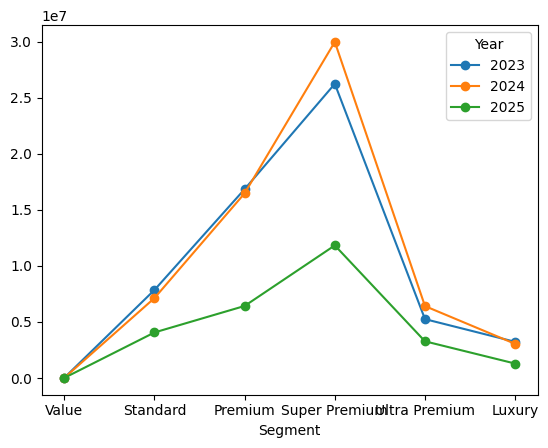

In [ ]:
Segment_order = ["Value", "Standard", "Premium", "Super Premium", "Ultra Premium", "Luxury"]

df_Diageo["Segment"] = pd.Categorical(
    df_Diageo["Segment"],
    categories = Segment_order,
    ordered = True
)

Sale_by_segment = df_Diageo.groupby(["Year", "Segment"]).agg(
    Total_Rev = ("Revenue","sum")
).sort_values(by = ["Year", "Segment"], ascending = True).reset_index()

Sale_by_segment_pivot = Sale_by_segment.pivot(
    index = "Segment",
    columns = "Year",
    values = "Total_Rev"
).sort_index()

# Draw line chart
plt.figure(figsize = (13,4))
Sale_by_segment_pivot.plot(kind = "line", marker = 'o')

In [ ]:
Sale_by_segment_2025 = df_Diageo[df_Diageo["Year"]==2025].groupby("Segment").agg(
    Total_Rev = ("Revenue","sum")
).sort_values(by = ["Total_Rev"], ascending = False).reset_index()

Sale_by_segment_2025["Perc_to_total_rev"] = round((Sale_by_segment_2025["Total_Rev"]/(Sale_by_segment_2025["Total_Rev"].sum()))*100, 2)
Sale_by_segment_2025["cumulative_perc"] = Sale_by_segment_2025["Perc_to_total_rev"].cumsum()

Sale_by_segment_2025.head(20)

C:\Users\vothk\AppData\Local\Temp\ipykernel_27616\768483280.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Sale_by_segment_2025 = df_Diageo[df_Diageo["Year"]==2025].groupby("Segment").agg(


,Segment,Total_Rev,Perc_to_total_rev,cumulative_perc
0,Super Premium,11822795.55,44.02,44.02
1,Premium,6421536.76,23.91,67.93
2,Standard,4057981.99,15.11,83.04
3,Ultra Premium,3268031.92,12.17,95.21
4,Luxury,1282394.78,4.78,99.99
5,Value,3009.66,0.01,100.00


### Sale by Frequency & CLV

In [ ]:
Sale_by_store_frequency_2025 = df_Diageo[df_Diageo["Year"]==2025].groupby(["Store Name", "Frequency", "CLV"]).agg(
    Total_Rev = ("Revenue","sum")
).sort_values(by = ["Total_Rev"], ascending = False).reset_index()

Sale_by_store_frequency_2025.head(10)

,Store Name,Frequency,CLV,Total_Rev
0,Hy-Vee #3 / Bdi / Des Moines,1595.867769,9316688.23,1169610.62
1,Central City 2,1641.098901,8910512.37,1010947.24
2,Another Round / Dewitt,988.836565,4188155.43,485553.92
3,I-80 Liquor / Council Bluffs,416.145251,2618359.51,411705.09
4,Benz Distributing,1382.967033,3454101.46,386456.51
5,Hy-Vee Wine And Spirits #1 (1281) / Iowa City,773.653846,3749020.54,310089.00
6,Wall To Wall Wine And Spirits / West Des Moines,754.710744,3211683.11,284156.60
7,Wilkie Liquors,590.220994,2085873.74,228122.29
8,Hy-Vee #3 Food & Drugstore / Davenport,999.669421,2173686.94,201514.51
9,Sam'S Club 6344 / Windsor Heights,228.319328,1852032.47,175520.34


In [ ]:
high_freq_threshold = df_Diageo["Frequency"].quantile(0.75)
high_clv_threshold = df_Diageo["CLV"].quantile(0.75)

df_Diageo["Freq_Segment"] = df_Diageo["Frequency"].apply(lambda x: "High" if x >= high_freq_threshold else "Low")
df_Diageo["CLV_Segment"] = df_Diageo["CLV"].apply(lambda x: "High" if x >= high_clv_threshold else "Low")


C:\Users\vothk\AppData\Local\Temp\ipykernel_27616\81346834.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Diageo["Freq_Segment"] = df_Diageo["Frequency"].apply(lambda x: "High" if x >= high_freq_threshold else "Low")
C:\Users\vothk\AppData\Local\Temp\ipykernel_27616\81346834.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Diageo["CLV_Segment"] = df_Diageo["CLV"].apply(lambda x: "High" if x >= high_clv_threshold else "Low")


In [ ]:
df_Diageo.head(3)

,Invoice/Item Number,Date,Store Name,Address,City,Store Location,County,Category Name,Manufacturer Name,Item Description,Pack,Bottle Volume,State Bottle Cost,State Bottle Retail,Bottles Sold,Sale,Volume Sold (Liters),Volume Sold (Gallons),Year,Quarter,Month,Weekday,Season,Revenue,CLV,Average_Order_Value,Frequency,Lifespan_months,Alcohol Type,Alcohol Brand,Segment,Half,Freq_Segment,CLV_Segment
0,INV-54554500001,2023-01-02,Best Trip,"1516, SE 1ST ST",Des Moines,POINT (-93.61379 41.57608),Polk,100% Agave Tequila,Diageo Americas,Casamigos Reposado,6,750,29.99,44.99,3,134.97,2.25,0.59,2023,1,1,Monday,Winter,89.97,117547.74,51.420709,189.447514,12.066667,Tequila & Mezcal,Casamigos,Ultra Premium,H1,Low,Low
2,INV-54554700003,2023-01-02,World Liquor & Tobacco + Vapors / Des Moines,3200 SOUTHEAST 14TH STREET,Des Moines,POINT (-93.59738 41.55503),Polk,Scotch Whiskies,Diageo Americas,Buchanan Deluxe 12Yr,12,750,20.99,31.49,12,377.88,9.00,2.37,2023,1,1,Monday,Winter,251.88,311668.10,87.522634,295.110497,12.066667,Whiskey,Buchanan,Super Premium,H1,Low,Low
5,INV-54555100014,2023-01-02,Hy-Vee Wine And Spirits / Hubbell,2310 HUBBELL AVE,Des Moines,POINT (-93.57411 41.60444),Polk,Canadian Whiskies,Diageo Americas,Crown Royal,12,1000,19.99,29.99,12,359.88,12.00,3.17,2023,1,1,Monday,Winter,239.88,378283.65,111.063902,280.714286,12.133333,Whiskey,Crown Royal,Super Premium,H1,Low,Low


In [ ]:
Store_by_performance_profile_2025 = df_Diageo[df_Diageo["Year"]==2025].groupby(["Store Name", "Freq_Segment", "CLV_Segment"]).agg(
    Total_Rev = ("Revenue","sum")
).sort_values(by = ["Total_Rev"], ascending = False).reset_index()

Store_by_performance_profile_2025.head(10)

,Store Name,Freq_Segment,CLV_Segment,Total_Rev
0,Hy-Vee #3 / Bdi / Des Moines,High,High,1169610.62
1,Central City 2,High,High,1010947.24
2,Another Round / Dewitt,High,High,485553.92
3,I-80 Liquor / Council Bluffs,High,High,411705.09
4,Benz Distributing,High,High,386456.51
5,Hy-Vee Wine And Spirits #1 (1281) / Iowa City,High,High,310089.00
6,Wall To Wall Wine And Spirits / West Des Moines,High,High,284156.60
7,Wilkie Liquors,High,High,228122.29
8,Hy-Vee #3 Food & Drugstore / Davenport,High,High,201514.51
9,Sam'S Club 6344 / Windsor Heights,Low,High,175520.34


In [ ]:
import pandas as pd

# Ensure Date is datetime
df_Diageo['Date'] = pd.to_datetime(df_Diageo['Date'])

# Filter data for H1 2024 (Jan 1 to Jun 30)
active_period = df_Diageo[(df_Diageo['Date'] >= '2024-01-01') & (df_Diageo['Date'] <= '2024-06-30')]
active_stores = set(active_period['Store Name'].unique())

# Filter data for H1 2025 (Jan 1 to Jun 30)
churn_period = df_Diageo[(df_Diageo['Date'] >= '2025-01-01') & (df_Diageo['Date'] <= '2025-06-30')]
current_stores = set(churn_period['Store Name'].unique())

# Find churned stores
churned_stores = active_stores - current_stores

# Optional: Get full info about churned stores from the old period
churned_df = active_period[active_period['Store Name'].isin(churned_stores)]

# View unique churned stores
print(f"Churned stores count: {len(churned_stores)}")
print(churned_df['Store Name'].unique())

C:\Users\vothk\AppData\Local\Temp\ipykernel_27616\3698968042.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Diageo['Date'] = pd.to_datetime(df_Diageo['Date'])


Churned stores count: 107
['Hy-Vee Food Store #1 (1105) / Davenport'
 'Liquor Tobacco & Vape / Manchester' 'Liquor Tobacco & Gas'
 'Blind Pig Cocktail Bodega West Des Moines' 'J & C Grocery / Allison'
 'Hy-Vee Wine & Spirits #2 / Davenport'
 "Randy'S Neighborhood Market / Dyersville" 'Brothers Market / Lisbon'
 'Dubuque Wine & Spirits' 'Kum & Go #53 / Iowa City'
 'Transit General Store / Sioux City' 'Pg Mini Mart'
 'Foodland Super Markets / Woodbine' 'Bravim Mart Incorporated / Ankeny'
 'Rina Mart Llc / Davenport' 'Central Mart I, Llc.'
 "Sergeant Bluff Pump 'N Pak / Sergeant Bluff" "Randall'S Stop N Shop"
 'Southgate Wine & Spirits / Ames' "Doc'S Liquor / Rock Valley"
 'World Class Liquor And Tobacco / Bondurant'
 'Mill Creek Liquors / Paullina' 'Kum & Go #544 / Eagle Grove'
 'Neighborhood Liquor And Smokes / Ames' 'Hy-Vee Food Store #2 / Waterloo'
 'Empire Liquor And Tobacco / Hiawatha' 'Dashmart / Urbandale'
 'Fareway Stores #850 / Spirit Lake'
 "Casey'S General Store #1894 / Spence

In [ ]:
summary = churned_df.groupby(['Store Name', 'County']).agg({
    'Revenue': 'sum',
    'Frequency': 'mean',
    'CLV': 'mean'
}).reset_index().sort_values(by='Revenue', ascending=False)

In [ ]:
summary

,Store Name,County,Revenue,Frequency,CLV
55,Hy-Vee Wine & Spirits #2 / Davenport,Scott,127909.87,329.000000,61996.21
52,Hy-Vee Food Store #2 / Waterloo,Black Hawk,29354.23,NaN,NaN
87,Randall'S Stop N Shop,Black Hawk,19898.06,NaN,NaN
35,Doc'S Liquor / Rock Valley,Sioux,19480.82,1.000000,66.00
36,Dubuque Wine & Spirits,Dubuque,18253.40,210.478723,104631.86
...,...,...,...,...,...
26,Corwith Farm Service,Hancock,227.88,NaN,NaN
83,Panther Travel Center / Cedar Falls,Black Hawk,169.46,NaN,NaN
90,Ross Tobacco Shop / Ottumwa,Wapello,157.41,12.000000,1309.28
38,Elkader Pronto Market / Elkader,Clayton,59.10,NaN,NaN


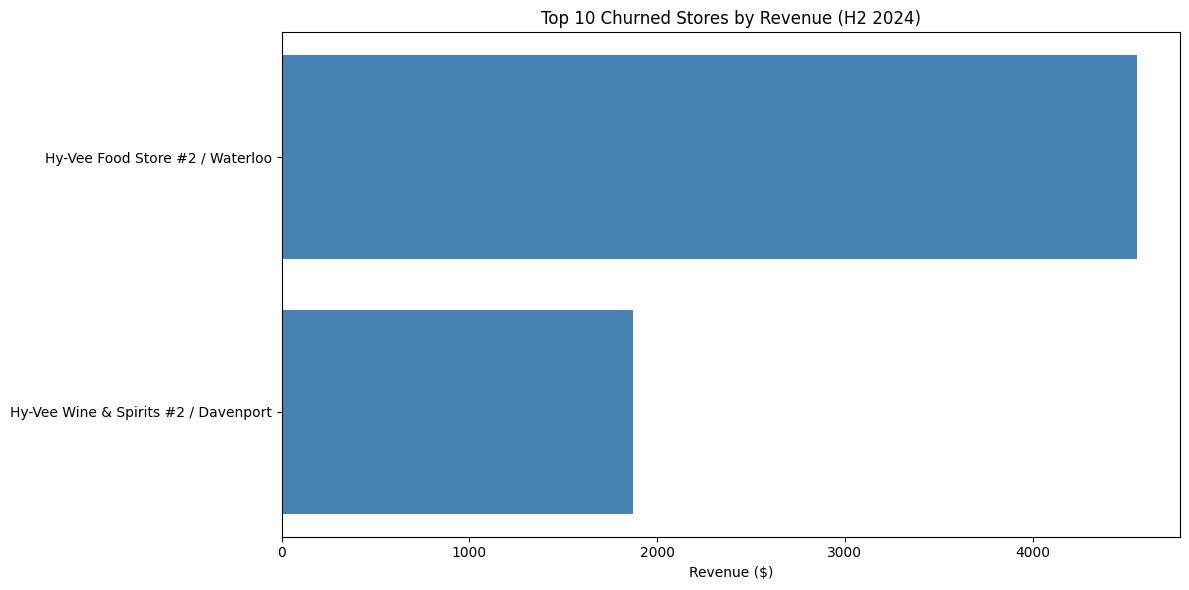

In [ ]:
import matplotlib.pyplot as plt

# If your DataFrame is named 'churned_df', sort and get top 10 by Revenue
top_churned = churned_df.sort_values(by='Revenue', ascending=False).head(10)

# Create horizontal bar chart
plt.figure(figsize=(12, 6))
plt.barh(top_churned['Store Name'], top_churned['Revenue'], color='steelblue')
plt.xlabel('Revenue ($)')
plt.title('Top 10 Churned Stores by Revenue (H2 2024)')
plt.gca().invert_yaxis()  # Highest revenue on top
plt.tight_layout()
plt.show()



In [ ]:

Sale_by_segment_2025["Perc_to_total_rev"] = round((Sale_by_segment_2025["Total_Rev"]/(Sale_by_segment_2025["Total_Rev"].sum()))*100, 2)
Sale_by_segment_2025["cumulative_perc"] = Sale_by_segment_2025["Perc_to_total_rev"].cumsum()

## Variant/ Product

### By Year

In [ ]:
Top_variant = df_Diageo_2025.groupby("Item Description").agg(
    Total_Rev = ("Revenue","sum")
).sort_values(by = "Total_Rev", ascending = False).reset_index()

Top_variant["Perc_vs_total_rev"] = round(((Top_variant["Total_Rev"]/(Top_variant["Total_Rev"].sum()))*100), 2)
Top_variant["Cumulative_percent"] = Top_variant["Perc_vs_total_rev"].cumsum()
Top_variant.head(10)

,Item Description,Total_Rev,Perc_vs_total_rev,Cumulative_percent
0,Crown Royal Regal Apple,2839559.04,10.57,10.57
1,Crown Royal,2819465.95,10.50,21.07
2,Captain Morgan Original Spiced,2623004.20,9.77,30.84
3,Captain Morgan Original Spiced Barrel,1869117.12,6.96,37.80
4,Crown Royal Blackberry,1346781.63,5.01,42.81
5,Crown Royal Peach,1307363.67,4.87,47.68
6,Don Julio Reposado,1056965.78,3.94,51.62
7,Smirnoff 80Prf Pet,957624.00,3.57,55.19
8,Smirnoff 80Prf,736024.22,2.74,57.93
9,Don Julio Blanco,699204.73,2.60,60.53


In [ ]:
Top_variant_year = df_Diageo.groupby(["Item Description", "Year"]).agg(
    Total_Rev = ("Revenue","sum")
).sort_values(by = "Total_Rev", ascending = False).reset_index()

Top_variant_year["Perc_vs_total_rev"] = round(((Top_variant_year["Total_Rev"]/(Top_variant_year["Total_Rev"].sum()))*100), 2)
Top_variant_year["Cumulative_percent"] = Top_variant_year["Perc_vs_total_rev"].cumsum()
Top_variant_year.head(10)

,Item Description,Year,Total_Rev,Perc_vs_total_rev,Cumulative_percent
0,Crown Royal,2023,6810860.75,4.56,4.56
1,Crown Royal,2024,6402312.84,4.29,8.85
2,Crown Royal Regal Apple,2024,6270591.89,4.20,13.05
3,Captain Morgan Original Spiced,2023,6191493.43,4.15,17.20
4,Crown Royal Regal Apple,2023,6162478.08,4.13,21.33
5,Captain Morgan Original Spiced,2024,5592308.85,3.75,25.08
6,Captain Morgan Original Spiced Barrel,2024,4746493.04,3.18,28.26
7,Captain Morgan Original Spiced Barrel,2023,4736198.97,3.17,31.43
8,Crown Royal Blackberry,2024,4315377.66,2.89,34.32
9,Crown Royal Peach,2023,3461472.60,2.32,36.64


<Figure size 1300x400 with 0 Axes>

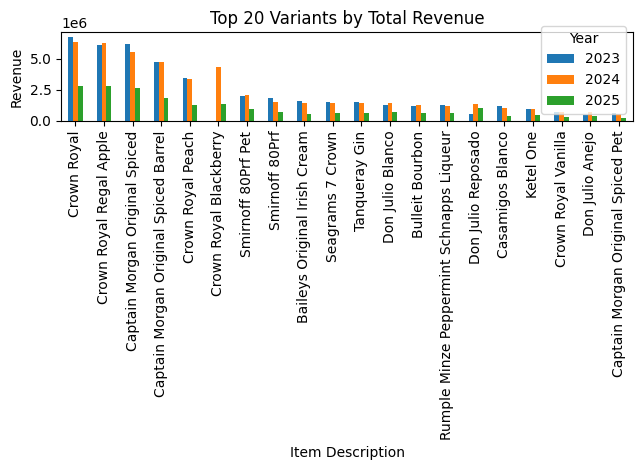

In [ ]:
Top_variant_year_pivot = Top_variant_year.pivot(
    index="Item Description",
    columns="Year",
    values="Total_Rev"
)

Top_variant_year_pivot["Total_Rev_All_Years"] = Top_variant_year_pivot.sum(axis=1)

Top_variant_year_pivot = Top_variant_year_pivot.sort_values(
    by="Total_Rev_All_Years", ascending=False
).drop(columns="Total_Rev_All_Years").head(20)

# Plot
plt.figure(figsize=(13, 4))
Top_variant_year_pivot.plot(kind='bar')
plt.title("Top 20 Variants by Total Revenue")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()

## Variant by Store

In [ ]:
Top_variant_year_2025 = Top_variant_year[Top_variant_year["Year"]==2025]
Top_variant_year_2025.head(3)


,Item Description,Year,Total_Rev,Perc_vs_total_rev,Cumulative_percent
11,Crown Royal Regal Apple,2025,2839559.04,1.90,40.81
12,Crown Royal,2025,2819465.95,1.89,42.70
13,Captain Morgan Original Spiced,2025,2623004.20,1.76,44.46


In [ ]:
Top_variant_list = Top_variant_year_2025["Item Description"].to_list()
df_top_variants_ordered = df_Diageo_2025.copy()
df_top_variants_ordered ["Item Description"] = pd.Categorical(
    df_top_variants_ordered ["Item Description"],
    categories = Top_variant_list,
    ordered = True
)

In [ ]:
Top_store_2025 = Sale_by_store_2025.head(20)
Top_store_2025_list = Top_store_2025["Store Name"].to_list()
df_top_variants_ordered["Store Name"] = pd.Categorical(
    df_top_variants_ordered["Store Name"],
    categories = Top_store_2025_list,
    ordered = True
)

In [ ]:
Variant_by_store = df_top_variants_ordered.groupby(["Store Name", "Item Description"]).agg(
    Total_Rev = ("Revenue","sum")
).sort_values(by = ["Store Name", "Item Description"], ascending = True).reset_index()

Variant_by_store.head(20)

C:\Users\vothk\AppData\Local\Temp\ipykernel_27616\4059773540.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Variant_by_store = df_top_variants_ordered.groupby(["Store Name", "Item Description"]).agg(


,Store Name,Item Description,Total_Rev
0,Hy-Vee #3 / Bdi / Des Moines,Crown Royal Regal Apple,143462.91
1,Hy-Vee #3 / Bdi / Des Moines,Crown Royal,145333.98
2,Hy-Vee #3 / Bdi / Des Moines,Captain Morgan Original Spiced,174585.60
3,Hy-Vee #3 / Bdi / Des Moines,Captain Morgan Original Spiced Barrel,3439.14
4,Hy-Vee #3 / Bdi / Des Moines,Crown Royal Blackberry,15531.12
5,Hy-Vee #3 / Bdi / Des Moines,Crown Royal Peach,49913.64
6,Hy-Vee #3 / Bdi / Des Moines,Don Julio Reposado,72941.22
7,Hy-Vee #3 / Bdi / Des Moines,Smirnoff 80Prf Pet,899.75
8,Hy-Vee #3 / Bdi / Des Moines,Smirnoff 80Prf,13767.00
9,Hy-Vee #3 / Bdi / Des Moines,Don Julio Blanco,89911.38


## Brand

In [ ]:
Top_brand = df_Diageo_2025.groupby("Alcohol Brand").agg(
    Total_Rev = ("Revenue","sum")
).sort_values(by = "Total_Rev", ascending = False).reset_index()

Top_brand["Perc_vs_total_rev"] = round(((Top_brand["Total_Rev"]/(Top_brand["Total_Rev"].sum()))*100), 2)
Top_brand["Cumulative_percent"] = Top_brand["Perc_vs_total_rev"].cumsum()
Top_brand.head(10)

,Alcohol Brand,Total_Rev,Perc_vs_total_rev,Cumulative_percent
0,Crown Royal,9230330.73,34.37,34.37
1,Captain Morgan,5266633.96,19.61,53.98
2,Smirnoff,2766458.17,10.30,64.28
3,Don Julio,2660095.19,9.91,74.19
4,Bulleit,971383.77,3.62,77.81
5,Casamigos,784809.09,2.92,80.73
6,Baileys,780870.17,2.91,83.64
7,Rumple Minze,720659.19,2.68,86.32
8,Tanqueray,707747.24,2.64,88.96
9,Seagrams,673577.86,2.51,91.47


## Categories

In [ ]:
Top_category = df_Diageo_2025.groupby("Alcohol Type").agg(
    Total_Rev = ("Revenue","sum")
).sort_values(by = "Total_Rev", ascending = False).reset_index()

Top_category["Perc_vs_total_rev"] = round(((Top_category["Total_Rev"]/(Top_category["Total_Rev"].sum()))*100), 2)
Top_category["Cumulative_percent"] = Top_category["Perc_vs_total_rev"].cumsum()
Top_category.head(10)

,Alcohol Type,Total_Rev,Perc_vs_total_rev,Cumulative_percent
0,Whiskey,10263986.65,38.22,38.22
1,Rum,5244761.93,19.53,57.75
2,Tequila & Mezcal,3578314.22,13.32,71.07
3,Vodka,3539310.09,13.18,84.25
4,Others,1482745.81,5.52,89.77
5,Liqueur,841528.38,3.13,92.90
6,Gin,802597.02,2.99,95.89
7,Schnapps,698249.11,2.60,98.49
8,Ready-to-Drink/Cocktails,342515.83,1.28,99.77
9,Spirits,55567.80,0.21,99.98


## Segment

In [ ]:
Top_segment = df_Diageo_2025.groupby("Segment").agg(
    Total_Rev = ("Revenue","sum")
).sort_values(by = "Total_Rev", ascending = False).reset_index()

Top_segment["Perc_vs_total_rev"] = round(((Top_segment["Total_Rev"]/(Top_segment["Total_Rev"].sum()))*100), 2)
Top_segment["Cumulative_percent"] = Top_segment["Perc_vs_total_rev"].cumsum()
Top_segment.head(10)

,Segment,Total_Rev,Perc_vs_total_rev,Cumulative_percent
0,Super Premium,11822795.55,44.02,44.02
1,Premium,6421536.76,23.91,67.93
2,Standard,4057981.99,15.11,83.04
3,Ultra Premium,3268031.92,12.17,95.21
4,Luxury,1282394.78,4.78,99.99
5,Value,3009.66,0.01,100.00


## City

In [ ]:
Top_city = df_Diageo_2025.groupby("City").agg(
    Total_Rev = ("Revenue","sum")
).sort_values(by = "Total_Rev", ascending = False).reset_index()

Top_city["Perc_vs_total_rev"] = round(((Top_city["Total_Rev"]/(Top_city["Total_Rev"].sum()))*100), 2)
Top_city["Cumulative_percent"] = Top_city["Perc_vs_total_rev"].cumsum()
Top_city.head(10)

,City,Total_Rev,Perc_vs_total_rev,Cumulative_percent
0,Des Moines,3519561.90,13.11,13.11
1,Cedar Rapids,1667202.93,6.21,19.32
2,Davenport,1086804.68,4.05,23.37
3,West Des Moines,1005660.75,3.74,27.11
4,Council Bluffs,989563.72,3.68,30.79
5,Sioux City,943550.38,3.51,34.30
6,Dubuque,797027.70,2.97,37.27
7,Waterloo,728995.93,2.71,39.98
8,Ankeny,709239.20,2.64,42.62
9,Iowa City,653059.35,2.43,45.05


## County

In [ ]:
Top_county = df_Diageo_2025.groupby("County").agg(
    Total_Rev = ("Revenue","sum")
).sort_values(by = "Total_Rev", ascending = False).reset_index()

Top_county["Perc_vs_total_rev"] = round(((Top_county["Total_Rev"]/(Top_county["Total_Rev"].sum()))*100), 2)
Top_county["Cumulative_percent"] = Top_county["Perc_vs_total_rev"].cumsum()
Top_county.head(10)

,County,Total_Rev,Perc_vs_total_rev,Cumulative_percent
0,Polk,6260321.29,23.31,23.31
1,Linn,2204399.14,8.21,31.52
2,Scott,1533081.34,5.71,37.23
3,Black Hawk,1286418.41,4.79,42.02
4,Johnson,1185544.35,4.41,46.43
5,Pottawattamie,1049702.93,3.91,50.34
6,Woodbury,994217.24,3.70,54.04
7,Dubuque,889077.49,3.31,57.35
8,Dallas,739403.24,2.75,60.10
9,Clinton,718638.19,2.68,62.78


# Part II - Deep dive to see where to improve

In [ ]:
df_segment_growth_by_month = df_Diageo_2025.groupby(["Segment", "Month"]).agg(
    Total_Rev = ("Revenue", "sum")
).sort_values(by=["Month", "Total_Rev"]).reset_index()
df_segment_growth_by_month

,Segment,Month,Total_Rev
0,Value,1,477.26
1,Luxury,1,224065.83
2,Ultra Premium,1,428908.66
3,Standard,1,500949.18
4,Premium,1,970400.85
5,Super Premium,1,1644286.65
6,Value,2,487.00
7,Luxury,2,184003.46
8,Standard,2,247555.24
9,Ultra Premium,2,527859.62


In [ ]:
df_segment_growth_by_month_pivot = df_segment_growth_by_month.pivot(
    index = "Month",
    columns = "Segment",
    values = "Total_Rev"
).sort_index()

df_segment_growth_by_month_pivot

Segment,Luxury,Premium,Standard,Super Premium,Ultra Premium,Value
Month,,,,,,
1,224065.83,970400.85,500949.18,1644286.65,428908.66,477.26
2,184003.46,995503.66,247555.24,2131855.42,527859.62,487.00
3,186796.52,967374.72,1638421.00,2180336.54,508715.88,496.74
4,222185.75,1118738.16,387590.99,2207634.29,574910.42,409.08
5,221447.17,1072114.10,663834.92,1792316.66,593974.15,642.84
6,243896.05,1297405.27,619630.66,1866365.99,633663.19,496.74


### Standard Segment is the growth engine
Which products (items/brands) are driving this?

In [ ]:
Item_drive_standard=df_Diageo[(df_Diageo["Half"]=="H1") & (df_Diageo["Segment"]=="Standard")].groupby(["Item Description", "Year"]).agg(
    Total_Rev = ("Revenue", "sum")
).reset_index()

Item_drive_standard.head(10)

,Item Description,Year,Total_Rev
0,Captain Morgan Long Island Iced Tea,2023,43681.00
1,Captain Morgan Long Island Iced Tea,2024,36102.00
2,Captain Morgan Long Island Iced Tea,2025,32626.00
3,Captain Morgan Mai Tai Rtd,2023,9185.00
4,Captain Morgan Mai Tai Rtd,2024,6996.00
5,Captain Morgan Mai Tai Rtd,2025,4301.00
6,Captain Morgan Original Spiced,2023,790524.00
7,Captain Morgan Original Spiced,2024,136710.00
8,Captain Morgan Original Spiced,2025,287685.91
9,Captain Morgan Original Spiced Barrel,2023,1724868.00


In [ ]:
Item_drive_standard_pivot = Item_drive_standard.pivot(
    index = "Item Description",
    columns = "Year",
    values = "Total_Rev"
).sort_index()

Item_drive_standard_pivot["24_vs_25_difference"] = Item_drive_standard_pivot[2025] - Item_drive_standard_pivot[2024]
Item_drive_standard_pivot["Contribution_to_total_sale_25"] = (Item_drive_standard_pivot[2025]/(Item_drive_standard_pivot[2025].sum()))*100
Item_drive_standard_pivot["Con_to_diff_sale_25"] = (Item_drive_standard_pivot["24_vs_25_difference"]/(Item_drive_standard_pivot["24_vs_25_difference"][Item_drive_standard_pivot["24_vs_25_difference"]>0].sum()))*100
Item_drive_standard_pivot = Item_drive_standard_pivot.sort_values(by = "24_vs_25_difference", ascending = False)
Item_drive_standard_pivot.head(10)

Year,2023,2024,2025,24_vs_25_difference,Contribution_to_total_sale_25,Con_to_diff_sale_25
Item Description,,,,,,
Captain Morgan Original Spiced,790524.00,136710.00,287685.91,150975.91,7.089384,50.839461
Smirnoff 80Prf Pet,589616.50,704932.00,804553.50,99621.50,19.826443,33.546434
Smirnoff Vanilla,20146.50,23282.25,40293.00,17010.75,0.992932,5.728181
Smirnoff Raspberry,35899.25,33383.25,45685.75,12302.50,1.125824,4.142730
Smirnoff Citrus,14504.00,11359.00,16141.25,4782.25,0.397765,1.610370
Smirnoff Strawberry,19295.50,17778.50,21765.25,3986.75,0.536356,1.342494
Captain Morgan White Pet,11070.00,10845.00,13935.00,3090.00,0.343397,1.040523
Smirnoff Blue Raspberry Lemonade,8982.75,8260.00,9676.00,1416.00,0.238444,0.476822
Smirnoff Peach Lemonade,16741.25,5634.50,6962.00,1327.50,0.171563,0.447021


### Which regions or stores are seeing this boom?

#### Store

In [ ]:
Store_drive_standard=df_Diageo[(df_Diageo["Half"]=="H1") & (df_Diageo["Segment"]=="Standard")].groupby(["Store Name", "Year"]).agg(
    Total_Rev = ("Revenue", "sum")
).reset_index()

Store_drive_standard_pivot = Store_drive_standard.pivot(
    index = "Store Name",
    columns = "Year",
    values = "Total_Rev"
).sort_index()

Store_drive_standard_pivot["24_vs_25_difference"] = Store_drive_standard_pivot[2025] - Store_drive_standard_pivot[2024]
Store_drive_standard_pivot["Contribution_to_total_sale_25"] = (Store_drive_standard_pivot[2025]/(Store_drive_standard_pivot[2025].sum()))*100
Store_drive_standard_pivot["Con_to_diff_sale_25"] = (Store_drive_standard_pivot["24_vs_25_difference"]/(Store_drive_standard_pivot["24_vs_25_difference"][Store_drive_standard_pivot["24_vs_25_difference"]>0].sum()))*100
Store_drive_standard_pivot = Store_drive_standard_pivot.sort_values(by = "24_vs_25_difference", ascending = False)
Store_drive_standard_pivot.head(10)

Year,2023,2024,2025,24_vs_25_difference,Contribution_to_total_sale_25,Con_to_diff_sale_25
Store Name,,,,,,
Wall To Wall Wine And Spirits / West Des Moines,46755.36,5918.22,66817.32,60899.10,1.646565,2.921452
Hy-Vee Wine And Spirits #1 (1281) / Iowa City,21061.38,8713.38,40886.01,32172.63,1.007545,1.543385
Fareway Stores #022 / Sioux City,20075.76,209.88,30800.88,30591.00,0.759020,1.467512
Hy-Vee Food Store (1011) / Altoona,12415.38,9544.14,39232.62,29688.48,0.966801,1.424216
Hy-Vee #3 Food & Drugstore / Davenport,23840.58,12715.11,39875.27,27160.16,0.982638,1.302927
Hy-Vee #2 / Dubuque,34108.78,11713.58,35930.68,24217.10,0.885432,1.161743
Hy-Vee #2 (1018) / Ames,38554.86,9632.64,33196.62,23563.98,0.818057,1.130411
Beer Thirty Carroll / Carroll,34629.40,2358.28,25868.76,23510.48,0.637478,1.127845
Fareway Stores #114 / Dubuque,17348.07,2797.15,24258.30,21461.15,0.597792,1.029534


#### City

In [ ]:
City_drive_standard=df_Diageo[(df_Diageo["Half"]=="H1") & (df_Diageo["Segment"]=="Standard")].groupby(["City", "Year"]).agg(
    Total_Rev = ("Revenue", "sum")
).reset_index()

City_drive_standard_pivot = City_drive_standard.pivot(
    index = "City",
    columns = "Year",
    values = "Total_Rev"
).sort_index()

City_drive_standard_pivot["24_vs_25_difference"] = City_drive_standard_pivot[2025] - City_drive_standard_pivot[2024]
City_drive_standard_pivot["Contribution_to_total_sale_25"] = (City_drive_standard_pivot[2025]/(City_drive_standard_pivot[2025].sum()))*100
City_drive_standard_pivot["Con_to_diff_sale_25"] = (City_drive_standard_pivot["24_vs_25_difference"]/(City_drive_standard_pivot["24_vs_25_difference"][City_drive_standard_pivot["24_vs_25_difference"]>0].sum()))*100
City_drive_standard_pivot = City_drive_standard_pivot.sort_values(by = "24_vs_25_difference", ascending = False)
City_drive_standard_pivot.head(10)

Year,2023,2024,2025,24_vs_25_difference,Contribution_to_total_sale_25,Con_to_diff_sale_25
City,,,,,,
Cedar Rapids,241909.07,112087.46,234297.03,122209.57,5.773733,5.999218
West Des Moines,206015.85,62904.88,182876.55,119971.67,4.506589,5.889361
Dubuque,156568.84,64500.47,178104.01,113603.54,4.388980,5.576752
Davenport,145348.96,69879.08,153526.04,83646.96,3.783310,4.106195
Des Moines,296689.17,207398.03,282654.88,75256.85,6.965405,3.694328
Ankeny,131551.94,52200.61,119546.59,67345.98,2.945962,3.305987
Sioux City,124061.03,49441.16,109016.82,59575.66,2.686479,2.924545
Carroll,55736.20,13473.71,67558.59,54084.88,1.664832,2.655005
Ames,112423.20,42065.92,94304.12,52238.20,2.323917,2.564352


#### County

In [ ]:
County_drive_standard=df_Diageo[(df_Diageo["Half"]=="H1") & (df_Diageo["Segment"]=="Standard")].groupby(["County", "Year"]).agg(
    Total_Rev = ("Revenue", "sum")
).reset_index()

County_drive_standard_pivot = County_drive_standard.pivot(
    index = "County",
    columns = "Year",
    values = "Total_Rev"
).sort_index()

County_drive_standard_pivot["24_vs_25_difference"] = County_drive_standard_pivot[2025] - County_drive_standard_pivot[2024]
County_drive_standard_pivot["Contribution_to_total_sale_25"] = (County_drive_standard_pivot[2025]/(County_drive_standard_pivot[2025].sum()))*100
County_drive_standard_pivot["Con_to_diff_sale_25"] = (County_drive_standard_pivot["24_vs_25_difference"]/(County_drive_standard_pivot["24_vs_25_difference"][County_drive_standard_pivot["24_vs_25_difference"]>0].sum()))*100
County_drive_standard_pivot = County_drive_standard_pivot.sort_values(by = "24_vs_25_difference", ascending = False)
County_drive_standard_pivot.head(10)

Year,2023,2024,2025,24_vs_25_difference,Contribution_to_total_sale_25,Con_to_diff_sale_25
County,,,,,,
Polk,852203.21,460095.85,790413.31,330317.46,19.477990,16.640967
Linn,324752.25,162987.84,309744.24,146756.40,7.632962,7.393398
Dubuque,210966.38,72983.46,198261.99,125278.53,4.885729,6.311371
Scott,221462.47,109158.63,224150.76,114992.13,5.523700,5.793155
Dallas,151822.66,43348.92,149076.16,105727.24,3.673653,5.326402
Johnson,145712.28,77679.08,160453.24,82774.16,3.954016,4.170055
Woodbury,139643.87,57081.47,123888.45,66806.98,3.052957,3.365649
Story,136093.55,54422.86,116547.16,62124.30,2.872047,3.129742
Black Hawk,205672.43,94332.67,153281.56,58948.89,3.777285,2.969769


### Premium segments are declining sharply

In [ ]:
Item_drive_premium=df_Diageo[(df_Diageo["Half"]=="H1") & (df_Diageo["Segment"]=="Premium")].groupby(["Item Description", "Year"]).agg(
    Total_Rev = ("Revenue", "sum")
).reset_index()

Item_drive_premium.head(10)

Item_drive_premium_pivot = Item_drive_premium.pivot(
    index = "Item Description",
    columns = "Year",
    values = "Total_Rev"
).sort_index()

Item_drive_premium_pivot["24_vs_25_difference"] = Item_drive_premium_pivot[2025] - Item_drive_premium_pivot[2024]
Item_drive_premium_pivot["Contribution_to_total_sale_25"] = (Item_drive_premium_pivot[2025]/(Item_drive_premium_pivot[2025].sum()))*100
Item_drive_premium_pivot["Con_to_diff_sale_25"] = (Item_drive_premium_pivot["24_vs_25_difference"]/(Item_drive_premium_pivot["24_vs_25_difference"][Item_drive_premium_pivot["24_vs_25_difference"]<0].sum()))*100
Item_drive_premium_pivot = Item_drive_premium_pivot.sort_values(by = "24_vs_25_difference", ascending = True)
Item_drive_premium_pivot.head(10)

Year,2023,2024,2025,24_vs_25_difference,Contribution_to_total_sale_25,Con_to_diff_sale_25
Item Description,,,,,,
Captain Morgan Original Spiced,2794560.15,2533071.28,2335318.29,-197752.99,36.366969,34.573623
Captain Morgan Original Spiced Pet,343349.24,297265.40,250532.75,-46732.65,3.901445,8.170380
Captain Morgan Private Stock,112709.56,129577.92,92441.55,-37136.37,1.439555,6.492639
Bulleit Bourbon,128345.81,166774.39,133905.35,-32869.04,2.085254,5.746572
Tanqueray Gin,524319.81,468670.26,441749.55,-26920.71,6.879187,4.706611
Johnnie Walker Red,83988.57,84417.34,59632.95,-24784.39,0.928640,4.333114
Smirnoff 80Prf,708460.05,671878.05,648583.97,-23294.08,10.100136,4.072559
Smirnoff Kissed Caramel,46200.00,68829.75,49714.50,-19115.25,0.774184,3.341964
Baileys Original Irish Cream 100Ml,36205.92,35537.76,19126.08,-16411.68,0.297843,2.869293


## Product Analysis

Top contributing items/brands

In [ ]:
Top_growth_brand=df_Diageo[df_Diageo["Half"]=="H1"].groupby(["Item Description", "Year"]).agg(
    Total_Rev = ("Revenue", "sum")
).reset_index()

Top_growth_brand_pivot = Top_growth_brand.pivot(
    index = "Item Description",
    columns = "Year",
    values = "Total_Rev"
).sort_index()

Top_growth_brand_pivot["24_vs_25_difference"] = Top_growth_brand_pivot[2025] - Top_growth_brand_pivot[2024]
Top_growth_brand_pivot["Con_to_total_sale_25"] = round((Top_growth_brand_pivot[2025]/(Top_growth_brand_pivot[2025].sum()))*100, 2)
Top_growth_brand_pivot["Con_to_diff_sale_25"] = (Top_growth_brand_pivot["24_vs_25_difference"]/(Top_growth_brand_pivot["24_vs_25_difference"][Top_growth_brand_pivot["24_vs_25_difference"]>0].sum()))*100
Top_growth_brand_pivot = Top_growth_brand_pivot.sort_values(by = "24_vs_25_difference", ascending = False)
Top_growth_brand_pivot.head(10)

Year,2023,2024,2025,24_vs_25_difference,Con_to_total_sale_25,Con_to_diff_sale_25
Item Description,,,,,,
Don Julio Reposado,247792.51,543082.66,1056965.78,513883.12,3.94,43.219434
Smirnoff 80Prf Pet,745360.00,853110.25,957624.00,104513.75,3.57,8.789985
Astral Tequila,6294.22,40460.88,130468.95,90008.07,0.49,7.570005
Don Julio Anejo,204207.26,356441.45,412326.04,55884.59,1.54,4.700097
Bulleit Old Fashioned Cocktail,73502.22,72035.06,111064.07,39029.01,0.41,3.282481
Rumple Minze Peppermint Schnapps Liqueur,641632.25,562293.18,601022.11,38728.93,2.24,3.257243
Crown Royal Apple And Peach Mini,NaN,27960.00,61510.00,33550.00,0.23,2.821677
Astral Reposado,NaN,12979.20,44665.92,31686.72,0.17,2.664968
Ketel One Espresso Martini Cocktail,NaN,12805.68,37725.03,24919.35,0.14,2.095808


Low performance item

In [ ]:
Top_growth_brand_pivot["diff_to_total_25"] = round((Top_growth_brand_pivot["24_vs_25_difference"]*-1) /(Top_growth_brand_pivot[2025].sum())*100, 2)
Top_growth_brand_pivot.drop(
    columns = ["Con_to_total_sale_25","Con_to_diff_sale_25"],
    inplace = True
)
Top_growth_brand_pivot = Top_growth_brand_pivot.sort_values(by = "diff_to_total_25", ascending = False)
Top_growth_brand_pivot.head(10)

Year,2023,2024,2025,24_vs_25_difference,diff_to_total_25
Item Description,,,,,
Crown Royal Blackberry,NaN,1916099.46,1346781.63,-569317.83,2.12
Crown Royal Peach,1632299.25,1635652.17,1307363.67,-328288.50,1.22
Captain Morgan Original Spiced Barrel,1724868.00,2172588.93,1869117.12,-303471.81,1.13
Crown Royal Regal Apple,2864614.19,3018992.36,2839559.04,-179433.32,0.67
Casamigos Blanco,576790.97,551193.49,387979.83,-163213.66,0.61
Crown Royal,3115744.64,2934226.12,2819465.95,-114760.17,0.43
Casamigos Reposado,323059.84,321174.64,206161.04,-115013.60,0.43
Seagrams 7 Crown,821424.99,719117.06,633455.76,-85661.30,0.32
Crown Royal W/Nfl Jersey Bag,NaN,69872.55,122.43,-69750.12,0.26


In [ ]:
# Get top 10 variants with biggest negative difference
top_dropped_items = Top_growth_brand_pivot[Top_growth_brand_pivot["24_vs_25_difference"]<0].index.tolist()


In [ ]:
drop_by_store = df_Diageo[
    (df_Diageo["Half"].eq("H1")) &
    (df_Diageo["Item Description"].isin(top_dropped_items)) &
    (df_Diageo["Year"].isin([2024, 2025]))
].groupby(["Store Name", "Year"]).agg(
    Revenue=("Revenue", "sum")
).unstack().fillna(0)

# Calculate the drop: 2024 - 2025
drop_by_store["Revenue_Drop"] = drop_by_store[("Revenue", 2024)] - drop_by_store[("Revenue", 2025)]
drop_by_store = drop_by_store.sort_values(by="Revenue_Drop", ascending=False)

drop_by_store.head(20)



Revenue             \
Year                                                 2024       2025   
Store Name                                                             
Hy-Vee #3 / Bdi / Des Moines                   1030148.13  887102.64   
Hy-Vee Wine & Spirits #2 / Davenport            105603.96       0.00   
Central City 2                                  809513.25  703945.33   
Another Round / Dewitt                          433650.83  385410.30   
Costco Wholesale #788 / Wdm                     133963.59   90320.52   
Northside Liquor And Grocery / Mason City        90413.76   55374.76   
Hy-Vee Wine And Spirits #1 (1281) / Iowa City   241803.70  206986.54   
Sam'S Club 6514 / Waterloo                      111106.38   79828.92   
Hy-Vee Food Store #2 / Council Bluffs            78398.63   50977.91   
Hy-Vee Food Store / Muscatine                    78327.28   51591.79   
Hillstreet News And Tobacco                      46696.92   20644.06   
Hy-Vee Food Store / Cedar Falls                  63305.32   37792.57   
The Boonedocks                                  146005.15  120623.36   
Sam'S Club 6344 / Windsor Heights               147220.63  121965.66   
Hy-Vee Food Store #2 / Waterloo                  25205.33       0.00   
Hy-Vee / Waukee                                  91245.82   66563.87   
Lake Liquors Wine And Spirits                    65048.66   40628.12   
Sam'S Club 6568 / Ames                           93608.52   69201.18   
Hy-Vee Wine And Spirits (1022) / Ankeny          91824.36   68688.14   
Hy-Vee / Waverly                                 69547.87   46411.65   

                                              Revenue_Drop  
Year                                                        
Store Name                                                  
Hy-Vee #3 / Bdi / Des Moines                     143045.49  
Hy-Vee Wine & Spirits #2 / Davenport             105603.96  
Central City 2                                   105567.92  
Another Round / Dewitt                            48240.53  
Costco Wholesale #788 / Wdm                       43643.07  
Northside Liquor And Grocery / Mason City         35039.00  
Hy-Vee Wine And Spirits #1 (1281) / Iowa City     34817.16  
Sam'S Club 6514 / Waterloo                        31277.46  
Hy-Vee Food Store #2 / Council Bluffs             27420.72  
Hy-Vee Food Store / Muscatine                     26735.49  
Hillstreet News And Tobacco                       26052.86  
Hy-Vee Food Store / Cedar Falls                   25512.75  
The Boonedocks                                    25381.79  
Sam'S Club 6344 / Windsor Heights                 25254.97  
Hy-Vee Food Store #2 / Waterloo                   25205.33  
Hy-Vee / Waukee                                   24681.95  
Lake Liquors Wine And Spirits                     24420.54  
Sam'S Club 6568 / Ames                            24407.34  
Hy-Vee Wine And Spirits (1022) / Ankeny           23136.22  
Hy-Vee / Waverly                                  23136.22

# Part 3 - Competitor & Market Analysis

In [ ]:
#Check main player share
H1_sales_by_manufacturer_pivot.head(10)

Year,Manufacturer Name,2023,2024,2025
0,Diageo Americas,27780908.89,28945030.05,26855750.66
1,Sazerac Company Inc,22132009.05,22582664.14,23675266.34
2,Jim Beam Brands,9607391.74,9470317.18,9064684.16
3,Heaven Hill Brands,8978277.90,9136869.29,8336198.17
4,Fifth Generation Inc,10107446.58,10235938.51,8170573.11
5,Pernod Ricard Usa,8914791.46,8964211.23,8158300.75
6,Brown Forman Corp.,6626680.03,6327981.69,6090865.88
7,Bacardi Usa Inc,7513482.15,6820035.99,6056262.38
8,Proximo,5356697.59,5378216.03,4935629.61
9,Luxco Inc,5287708.24,5150016.01,4681890.83


In [ ]:
H1_sales_by_manufacturer_pivot["23_share"] = round((H1_sales_by_manufacturer_pivot[2023]/(H1_sales_by_manufacturer_pivot[2023].sum()))*100, 2)
H1_sales_by_manufacturer_pivot["24_share"] = round((H1_sales_by_manufacturer_pivot[2024]/(H1_sales_by_manufacturer_pivot[2024].sum()))*100, 2)
H1_sales_by_manufacturer_pivot["25_share"] = round((H1_sales_by_manufacturer_pivot[2025]/(H1_sales_by_manufacturer_pivot[2025].sum()))*100, 2)
H1_sales_by_manufacturer_pivot["YoY Growth"] = H1_sales_by_manufacturer_pivot["25_share"] - H1_sales_by_manufacturer_pivot["24_share"]
H1_sales_by_manufacturer_pivot.head(10)

Year,Manufacturer Name,2023,2024,2025,23_share,24_share,25_share,YoY Growth
0,Diageo Americas,27780908.89,28945030.05,26855750.66,19.32,20.23,19.86,-0.37
1,Sazerac Company Inc,22132009.05,22582664.14,23675266.34,15.39,15.78,17.51,1.73
2,Jim Beam Brands,9607391.74,9470317.18,9064684.16,6.68,6.62,6.70,0.08
3,Heaven Hill Brands,8978277.90,9136869.29,8336198.17,6.24,6.38,6.16,-0.22
4,Fifth Generation Inc,10107446.58,10235938.51,8170573.11,7.03,7.15,6.04,-1.11
5,Pernod Ricard Usa,8914791.46,8964211.23,8158300.75,6.20,6.26,6.03,-0.23
6,Brown Forman Corp.,6626680.03,6327981.69,6090865.88,4.61,4.42,4.50,0.08
7,Bacardi Usa Inc,7513482.15,6820035.99,6056262.38,5.23,4.77,4.48,-0.29
8,Proximo,5356697.59,5378216.03,4935629.61,3.73,3.76,3.65,-0.11
9,Luxco Inc,5287708.24,5150016.01,4681890.83,3.68,3.60,3.46,-0.14


In [ ]:
Quadrant_data = H1_sales_by_manufacturer_pivot[["Manufacturer Name", 2025, "YoY Growth"]].head(10)
Quadrant_data

Year,Manufacturer Name,2025,YoY Growth
0,Diageo Americas,26855750.66,-0.37
1,Sazerac Company Inc,23675266.34,1.73
2,Jim Beam Brands,9064684.16,0.08
3,Heaven Hill Brands,8336198.17,-0.22
4,Fifth Generation Inc,8170573.11,-1.11
5,Pernod Ricard Usa,8158300.75,-0.23
6,Brown Forman Corp.,6090865.88,0.08
7,Bacardi Usa Inc,6056262.38,-0.29
8,Proximo,4935629.61,-0.11
9,Luxco Inc,4681890.83,-0.14


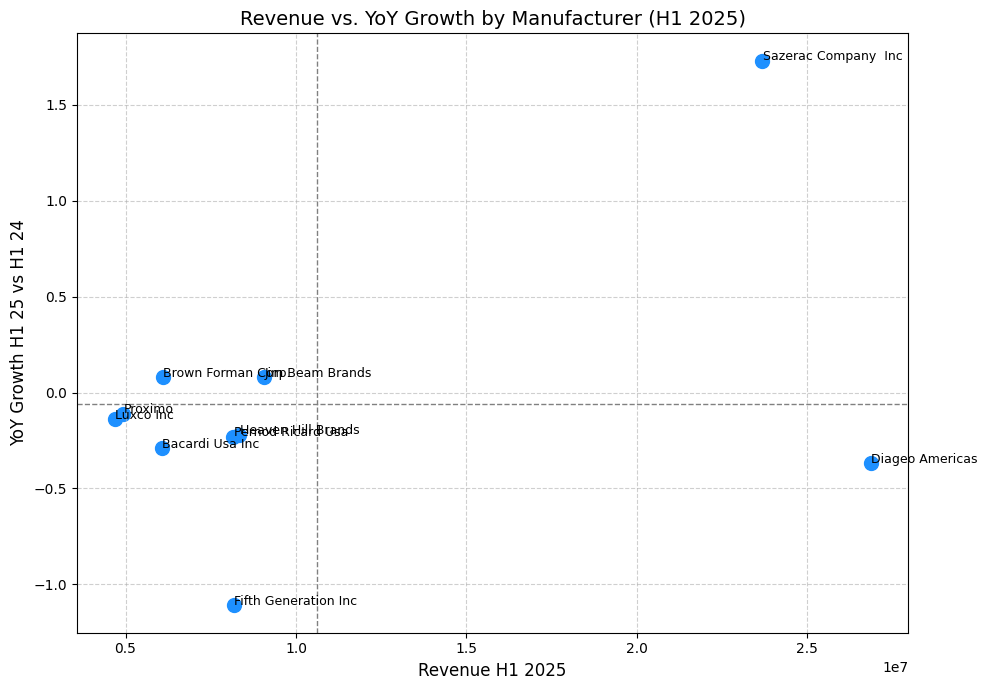

In [ ]:
# Dataset
df = Quadrant_data.copy()

# Compute averages to use as quadrant boundaries
x_avg = df[2025].mean()
y_avg = df["YoY Growth"].mean()

# Create plot
plt.figure(figsize=(10, 7))
plt.scatter(df[2025], df["YoY Growth"], color='dodgerblue', s=100)

# Annotate points with manufacturer names
for i, row in df.iterrows():
    plt.text(row[2025] + 10000, row["YoY Growth"] + 0.002, row["Manufacturer Name"], fontsize=9)

# Draw quadrant lines
plt.axvline(x=x_avg, color='gray', linestyle='--', linewidth=1)
plt.axhline(y=y_avg, color='gray', linestyle='--', linewidth=1)

# Labels and title
plt.title("Revenue vs. YoY Growth by Manufacturer (H1 2025)", fontsize=14)
plt.xlabel("Revenue H1 2025", fontsize=12)
plt.ylabel("YoY Growth H1 25 vs H1 24", fontsize=12)

# Grid and layout
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# Sazerac deepdive

In [ ]:
df_Sazerac = df_clean[df_clean["Manufacturer Name"] == "Sazerac Company  Inc"]
df_Sazerac.head(3)

,Invoice/Item Number,Date,Store Name,Address,City,Store Location,County,Category Name,Manufacturer Name,Item Description,Pack,Bottle Volume,State Bottle Cost,State Bottle Retail,Bottles Sold,Sale,Volume Sold (Liters),Volume Sold (Gallons),Year,Quarter,Month,Weekday,Season,Revenue,CLV,Average_Order_Value,Frequency,Lifespan_months,Alcohol Type,Alcohol Brand,Segment,Half
7,INV-54554800001,2023-01-02,Casey'S General Store #2532 / Eldora,1807 EDGINGTON AVE,Eldora,POINT (-93.10608 42.3606),Hardin,Whiskey Liqueur,Sazerac Company Inc,Fireball Cinnamon Whiskey 100Ml Carrier,8,100,6.00,9.00,32,288.0,3.2,0.84,2023,1,1,Monday,Winter,192.0,39710.72,89.843258,37.247191,11.866667,Whiskey,Fireball,Ultra Premium,H1
11,INV-54554100005,2023-01-02,"Central City Liquor, Inc.",1460 2ND AVE,Des Moines,POINT (-93.61979 41.60558),Polk,Whiskey Liqueur,Sazerac Company Inc,Southern Comfort Mini,10,50,5.16,7.74,10,77.4,0.5,0.13,2023,1,1,Monday,Winter,51.6,1211350.28,133.762178,746.373626,12.133333,Whiskey,Southern Comfort,Luxury,H1
13,INV-54554100041,2023-01-02,"Central City Liquor, Inc.",1460 2ND AVE,Des Moines,POINT (-93.61979 41.60558),Polk,American Cordials & Liqueurs,Sazerac Company Inc,Di Amore Amaretto,12,750,6.00,9.00,2,18.0,1.5,0.39,2023,1,1,Monday,Winter,12.0,1211350.28,133.762178,746.373626,12.133333,Liqueur,Other,Standard,H1


## Sazerac top variant

In [ ]:
Sazerac_Sale_by_variant_2025 = df_Sazerac[df_Sazerac["Year"]==2025].groupby("Item Description").agg(
    Total_Rev = ("Revenue","sum")
).sort_values(by = ["Total_Rev"], ascending = False).reset_index()

Sazerac_Sale_by_variant_2025["Perc_to_total_rev"] = round((Sazerac_Sale_by_variant_2025["Total_Rev"]/(Sazerac_Sale_by_variant_2025["Total_Rev"].sum()))*100, 2)
Sazerac_Sale_by_variant_2025["cumulative_perc"] = Sazerac_Sale_by_variant_2025["Perc_to_total_rev"].cumsum()

Sazerac_Sale_by_variant_2025.head(10)

,Item Description,Total_Rev,Perc_to_total_rev,cumulative_perc
0,Fireball Cinnamon Whiskey,3386731.77,14.30,14.30
1,Fireball Cinnamon Whiskey Mini Sleeve,1847212.11,7.80,22.10
2,Fireball Cinnamon Whiskey Pet,1009989.00,4.27,26.37
3,Fris Danish Vodka,958414.62,4.05,30.42
4,Platinum 7X Vodka,681597.16,2.88,33.30
5,Dr Mcgillicuddys Cherry,631748.53,2.67,35.97
6,Fireball Cinnamon Whiskey Mini Dispenser,490999.80,2.07,38.04
7,Fireball Cinnamon Whiskey 100Ml Carrier,463350.00,1.96,40.00
8,Svedka 80Prf,440463.86,1.86,41.86
9,Barton Vodka,430753.76,1.82,43.68


In [ ]:
# Bước 1: Lọc dữ liệu Sazerac H1
df_Sazerac_H1 = df_Sazerac[df_Sazerac["Half"] == "H1"]

# Bước 2: Groupby theo Item và Year
Sazerac_yoy = df_Sazerac_H1.groupby(["Item Description", "Year"]).agg(
    Total_Rev = ("Revenue", "sum")
).reset_index()

# Bước 3: Pivot sang dạng wide
Sazerac_yoy_pivot = Sazerac_yoy.pivot(
    index = "Item Description",
    columns = "Year",
    values = "Total_Rev"
).reset_index()

# Bước 4: Tính tăng trưởng YoY H1 2024 vs 2025
Sazerac_yoy_pivot["YoY_Growth_H1_25_vs_24"] = (
    (Sazerac_yoy_pivot[2025] - Sazerac_yoy_pivot[2024]) / Sazerac_yoy_pivot[2024]
).round(2)

# Bước 5: Sắp xếp theo tăng trưởng giảm dần
Sazerac_yoy_pivot = Sazerac_yoy_pivot.sort_values(by="YoY_Growth_H1_25_vs_24", ascending=False)

# Xem kết quả
Sazerac_yoy_pivot.head(10)


Year,Item Description,2023,2024,2025,YoY_Growth_H1_25_vs_24
24,99 Brand Flavored Lemonades Mini,NaN,5263.20,53552.8,9.17
241,Fireball Gift Box,NaN,1135.20,10846.8,8.55
302,Handy Schiller Old Fashioned,NaN,7600.00,54900.0,6.22
123,Buffalo Trace Sazerac Barrel Select Buy The Ba...,NaN,6612.00,31320.0,3.74
0,1792 Bottled In Bond Bourbon,NaN,4284.00,13209.0,2.08
307,Heublein Manhattan,7247.5,8021.00,24310.0,2.03
75,99 Watermelon Schnapps,NaN,96.00,288.0,2.00
225,Eh Taylor Jr Small Batch,10656.0,11250.00,31157.5,1.77
327,Jp Wisers Deluxe W/10Yr 50Ml,NaN,494.67,1349.1,1.73
280,Ha 1792 12Yr Old Bourbon,NaN,1200.00,3240.0,1.70


In [ ]:
# Bước 2: Group theo Store và Year
Sazerac_yoy_store = df_Sazerac_H1.groupby(["Store Name", "Year"]).agg(
    Total_Rev = ("Revenue", "sum")
).reset_index()

# Bước 3: Pivot để so sánh 2024 vs 2025
Sazerac_store_pivot = Sazerac_yoy_store.pivot(
    index = "Store Name",
    columns = "Year",
    values = "Total_Rev"
).reset_index()

# Bước 4: Tính chênh lệch & YoY growth
Sazerac_store_pivot["Revenue_Diff"] = Sazerac_store_pivot[2025] - Sazerac_store_pivot[2024]
Sazerac_store_pivot["YoY_Growth_H1_25_vs_24"] = round(
    (Sazerac_store_pivot["Revenue_Diff"] / Sazerac_store_pivot[2024]) * 100, 2
)

# Bước 5: Lọc ra top store theo doanh thu H1 2025
Top_store_2025 = Sazerac_store_pivot.sort_values(by=2025, ascending=False).head(10)

Top_store_2025


Year,Store Name,2023,2024,2025,Revenue_Diff,YoY_Growth_H1_25_vs_24
1133,Hy-Vee #3 / Bdi / Des Moines,511608.62,485689.39,545840.27,60150.88,12.38
731,Central City 2,346431.69,373609.94,408274.59,34664.65,9.28
1303,Hy-Vee Wine And Spirits #1 (1281) / Iowa City,380080.80,349279.38,355074.88,5795.50,1.66
35,Another Round / Dewitt,272745.52,280399.93,273652.10,-6747.83,-2.41
1219,Hy-Vee Food Store #1 (1410) / Mason City,152987.73,163993.62,184134.30,20140.68,12.28
1853,Sam'S Club 8238 / Davenport,213662.40,182184.24,180735.48,-1448.76,-0.80
1641,Marshall Beer Wine Spirits,52004.04,91065.33,180705.95,89640.62,98.44
1324,I-80 Liquor / Council Bluffs,156427.40,187452.90,179180.46,-8272.44,-4.41
1846,Sam'S Club 6344 / Windsor Heights,242839.08,232868.58,178022.24,-54846.34,-23.55
1852,Sam'S Club 8162 / Cedar Rapids,222633.54,202841.70,171454.97,-31386.73,-15.47
